# 1. 패키지 준비 및 데이터 가져오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data_train = pd.read_csv("dataset/train.csv")
data_test = pd.read_csv("dataset/test.csv")

In [4]:
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

# 2. Exploratory Data Analysis

## 2-1. df 구성

In [7]:
df_train.shape , df_test.shape

((103904, 25), (25976, 25))

In [8]:
#처음 index 0~103903까지 train dataset

학습 과정과 테스트 과정 모두 데이터 전처리가 필요하므로 전처리 과정에선 두 데이터셋을 합쳐준다

In [10]:
df = pd.concat([df_train, df_test], ignore_index=True)

print(df.shape)

(129880, 25)


In [11]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

종속변수에 영향을 미치지 않는 인덱스, id 셀 또한 삭제해준다.<br>
그러나 후에 train데이터셋과 test데이터셋을 확실하게 분리할 수 있도록 합쳐진 인덱스 셀을 다시 집어넣었다

In [14]:
df = df.drop(columns=['Unnamed: 0'])
df['Index'] = df.index

In [15]:
# index 0~103903 가 train 데이터

## 2-2. 결측치 처리

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [18]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
Index           

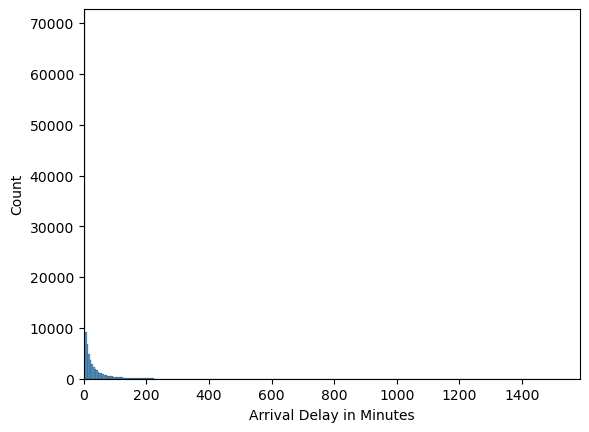

In [19]:
# 데이터프레임 df에서 'Arrival Delay in Minutes' 열의 최댓값 계산
max_delay = df['Arrival Delay in Minutes'].max()

# 히스토그램 그리기
sns.histplot(data=df, x='Arrival Delay in Minutes', bins=int(max_delay), binwidth=5) #5분단위로
plt.xlim(0, max_delay)  # x축 범위 설정

# y축 최댓값 설정
max_count = df['Arrival Delay in Minutes'].value_counts().max()
plt.ylim(0, max_count)  # y축 범위 설정

plt.show()

대부분의 '도착지연(5분)' 데이터가 0에 모여있으므로 결측치를 평균값으로 처리해준다.

In [21]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

df['Arrival Delay in Minutes'].isnull().sum() #다시 결측치 확인

0

## 2-3. 종속변수 분포 확인

종속변수가 skewed data인 경우에 데이터가 많은 구간은 학습이 잘되고 데이터가 없는 구간은 학습이 잘 안돼 예측력이 떨어질 수 있다. <br>
이럴 경우 로그를 취하는 등 추가적인 처리를 해주면 좋다!

<strong>일반적인 머신러닝 대회에선 test데이터셋의 종속변수를 제공하지 않으므로 train데이터셋만 갖고 분포를 확인해보도록 한다.</strong>

In [25]:
df_train['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

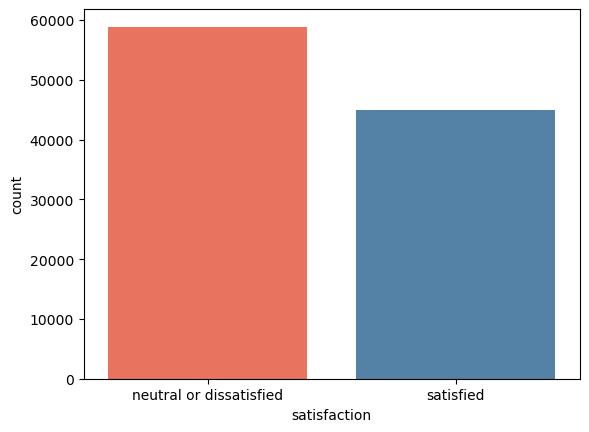

In [26]:
sns.countplot(data=df_train, x='satisfaction',palette=['#FF6347', '#4682B4'])

데이터를 확인해보니 꽤 균형 잡혀 분포하기 때문에 특별한 처리가 필요없을 것 같다<br>
<br>
The data is quite balanced. <br>
So It does not need any special treatment!

## 2-4. 독립변수 분포 확인

In [29]:
for i in df.columns:
    if i != 'Index':
        print(df_train[i].value_counts().to_frame())
        print("------------------------")

        count
id           
70172       1
116739      1
6259        1
17470       1
118574      1
...       ...
107167      1
103283      1
112365      1
98359       1
62567       1

[103904 rows x 1 columns]
------------------------
        count
Gender       
Female  52727
Male    51177
------------------------
                   count
Customer Type           
Loyal Customer     84923
disloyal Customer  18981
------------------------
     count
Age       
39    2969
25    2798
40    2574
44    2482
42    2457
..     ...
74      47
76      45
79      42
78      33
85      17

[75 rows x 1 columns]
------------------------
                 count
Type of Travel        
Business travel  71655
Personal Travel  32249
------------------------
          count
Class          
Business  49665
Eco       46745
Eco Plus   7494
------------------------
                 count
Flight Distance       
337                660
594                395
404                392
862                369
2475     

## 2-5. 문자형 데이터를 숫자형으로 인코딩

In [31]:
object_columns = df.select_dtypes(include='object').columns.to_list()
print(object_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [32]:
print("Train Dataset")
for i in object_columns:
    print(df_train[i].value_counts().to_frame())
    print("------------------------")
print("")
print("**************************")    
print("")
print("Test Dataset")
for i in object_columns:
    print(df_test[i].value_counts().to_frame())
    print("------------------------")

Train Dataset
        count
Gender       
Female  52727
Male    51177
------------------------
                   count
Customer Type           
Loyal Customer     84923
disloyal Customer  18981
------------------------
                 count
Type of Travel        
Business travel  71655
Personal Travel  32249
------------------------
          count
Class          
Business  49665
Eco       46745
Eco Plus   7494
------------------------
                         count
satisfaction                  
neutral or dissatisfied  58879
satisfied                45025
------------------------

**************************

Test Dataset
        count
Gender       
Female  13172
Male    12804
------------------------
                   count
Customer Type           
Loyal Customer     21177
disloyal Customer   4799
------------------------
                 count
Type of Travel        
Business travel  18038
Personal Travel   7938
------------------------
          count
Class          
Business  12

train 데이터셋과 test 데이터셋을 비교한 이유는, <br>
만약 train 데이터셋에 없는 object 데이터가 test 데이터엔 있는 경우에 예측력이 떨어지는 것을 방지하기 위함

- 데이터가 두가지 밖에 없는 'Gender', 'Customer Type', 'Type of Travel', 'satisfaction' 은 1과 0으로 변환한다 <br>
- 세가지 경우가 있는 'Class' 데이터의 경우 원 핫 인코딩을 진행한다

<strong>** 원 핫 인코딩 </strong><br>
머신러닝을 할 때 문자형 데이터들을 사용해서 데이터를 예측하기는 어렵기 때문에 보통 숫자형 데이터로 인코딩하는데,<br>
원 핫 인코딩은 인코딩 방법 중 하나이다.<br>
예를들어 과일 column에 사과,귤,바나나가 있다고 가정해보자<br>
사과 : 0 , 귤 : 1 , 바나나 : 2 로 치환해주면 좋겠지만 이렇게 할 경우에 귤+귤 = 바나나 로 잘못 해석될 여지가 다분하다<br>
그러므로 3개의 컬럼을 만들어 각 과일에 해당하는 데이터는 1, 아닌 경우는 0으로 인코딩을 한다.

### 바이너리 인코딩

In [37]:
# 두 가지 값만 있는 컬럼들을 0과 1로 매핑
binary_mapping = {
    'Female': 0, 'Male': 1,
    'Loyal Customer': 1, 'disloyal Customer': 0,
    'Business travel': 1, 'Personal Travel': 0,
    'neutral or dissatisfied': 0, 'satisfied': 1
}

df['Gender'] = df['Gender'].map(binary_mapping)
df['Customer Type'] = df['Customer Type'].map(binary_mapping)
df['Type of Travel'] = df['Type of Travel'].map(binary_mapping)
df['satisfaction'] = df['satisfaction'].map(binary_mapping)

### 원핫 인코딩

In [39]:
class_dummies = pd.get_dummies(df['Class'], prefix='Class').astype(int)
df = pd.concat([df, class_dummies], axis=1)

# 원래의 Class 컬럼 제거
df.drop('Class', axis=1, inplace=True)

In [40]:
print(df)

            id  Gender  Customer Type  Age  Type of Travel  Flight Distance  \
0        70172       1              1   13               0              460   
1         5047       1              0   25               1              235   
2       110028       0              1   26               1             1142   
3        24026       0              1   25               1              562   
4       119299       1              1   61               1              214   
...        ...     ...            ...  ...             ...              ...   
129875   78463       1              0   34               1              526   
129876   71167       1              1   23               1              646   
129877   37675       0              1   17               0              828   
129878   90086       1              1   14               1             1127   
129879   34799       0              1   42               0              264   

        Inflight wifi service  Departure/Arrival ti

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

## 2-6. 상관분석

<Axes: >

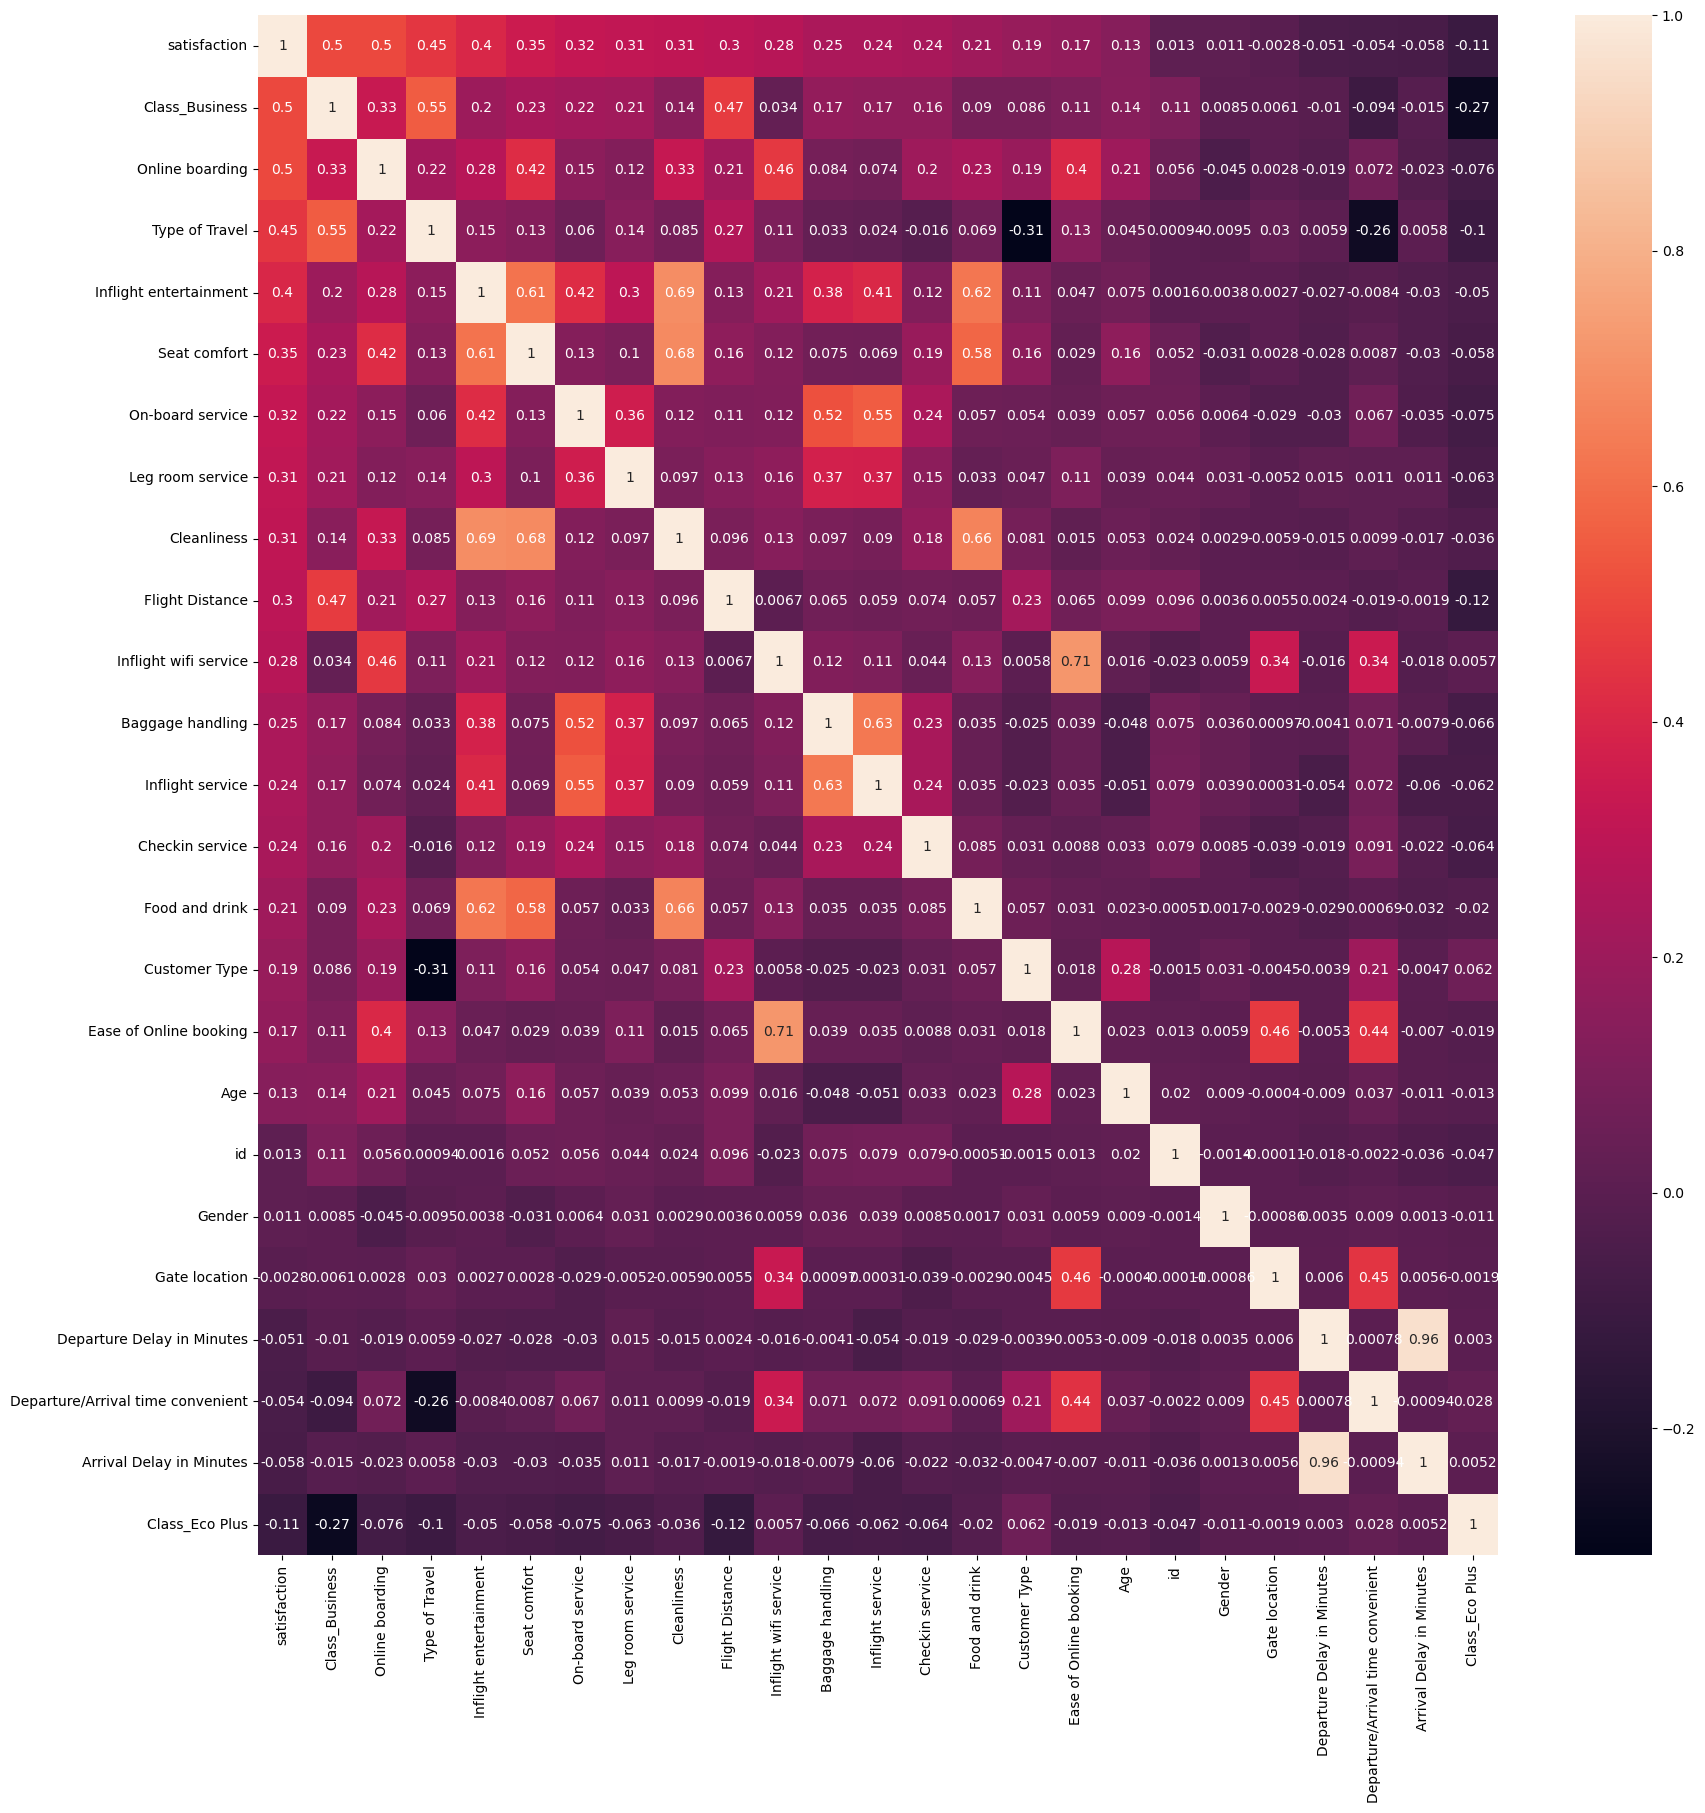

In [43]:
df_without_index = df.loc[:,df.columns != 'Index']

corr = df_without_index.corr()
top_corr=df_without_index[corr.nlargest(25,'satisfaction')['satisfaction'].index].corr() #satisfaction을 기준으로 상관관계를 내림차순 보여줌
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(top_corr, annot=True)

양의 상관관계가 가장 높은 Class_business, Online boarding,Type of Travel 음의 상관관계가 높은 Class_Eco를 주목해볼 필요가 있다

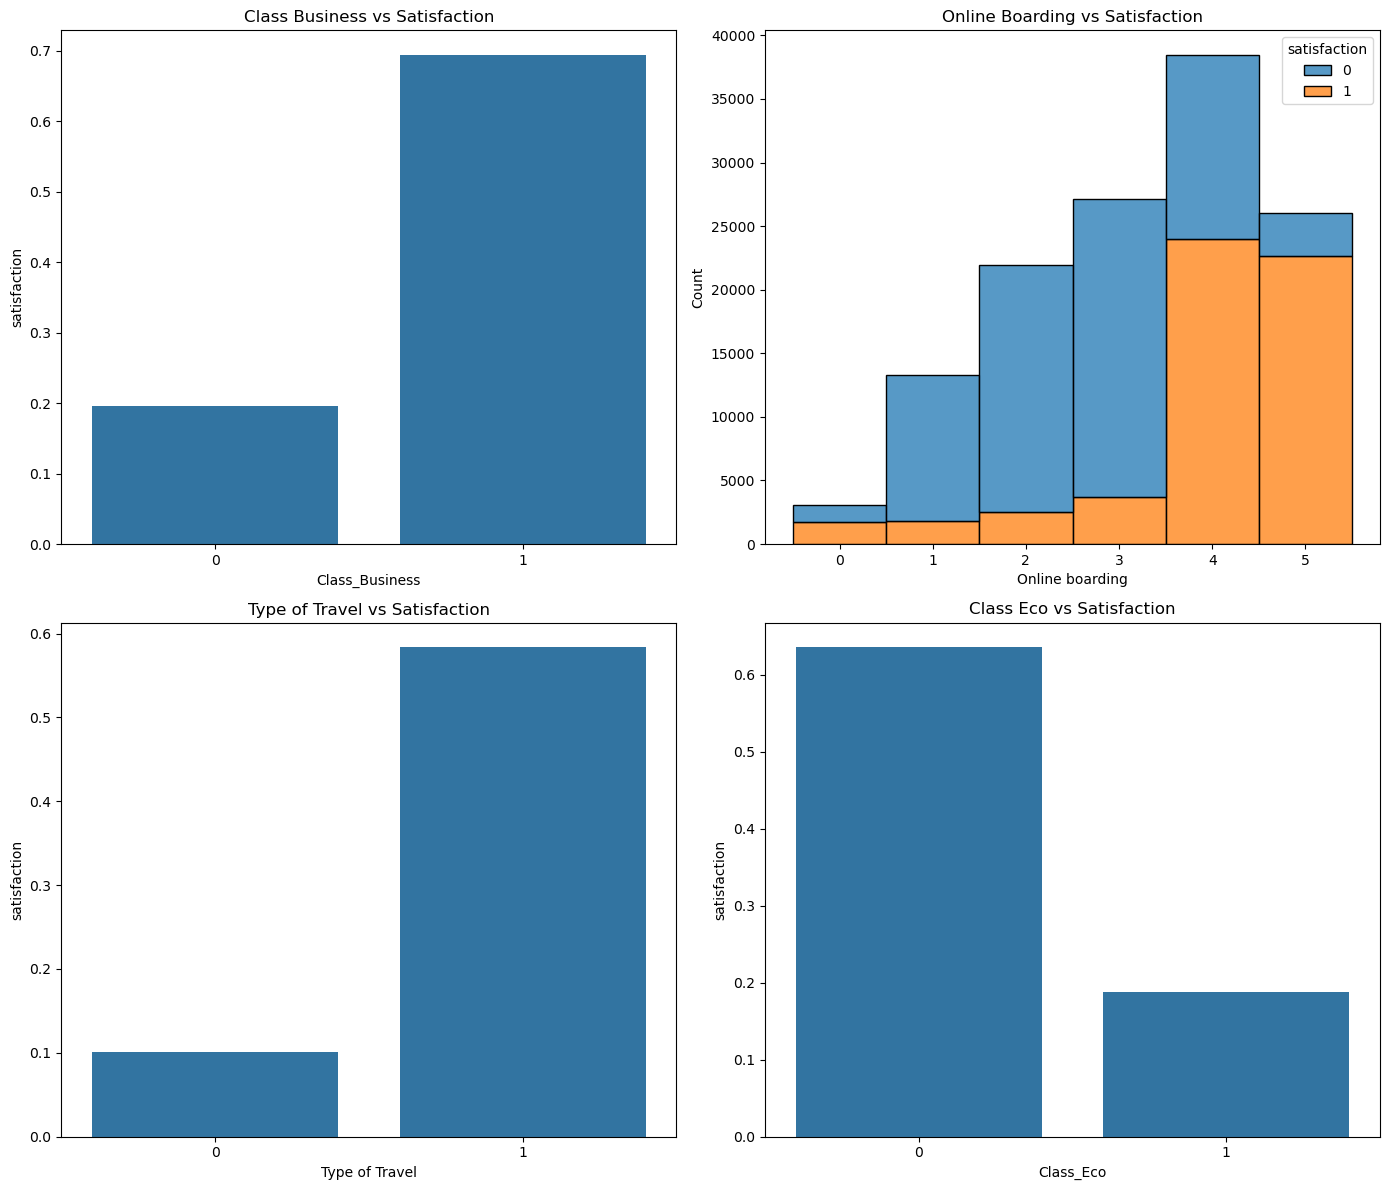

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 플롯 생성 설정
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Class Business vs Satisfaction
sns.barplot(x='Class_Business', y='satisfaction', data=df, ax=axs[0, 0], errorbar=None)
axs[0, 0].set_title('Class Business vs Satisfaction')

# Online Boarding vs Satisfaction
sns.histplot(data=df, x='Online boarding', hue='satisfaction', multiple='stack', discrete=True, ax=axs[0, 1])
axs[0, 1].set_title('Online Boarding vs Satisfaction')

# Type of Travel vs Satisfaction
sns.barplot(x='Type of Travel', y='satisfaction', data=df, ax=axs[1, 0], errorbar=None)
axs[1, 0].set_title('Type of Travel vs Satisfaction')

# Class Eco vs Satisfaction
sns.barplot(x='Class_Eco', y='satisfaction', data=df, ax=axs[1, 1], errorbar=None)
axs[1, 1].set_title('Class Eco vs Satisfaction')

# 전체 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()


위 네개의 데이터에 상관관계가 있음이 확인됨

전체적인 데이터 분포도 확인합니다

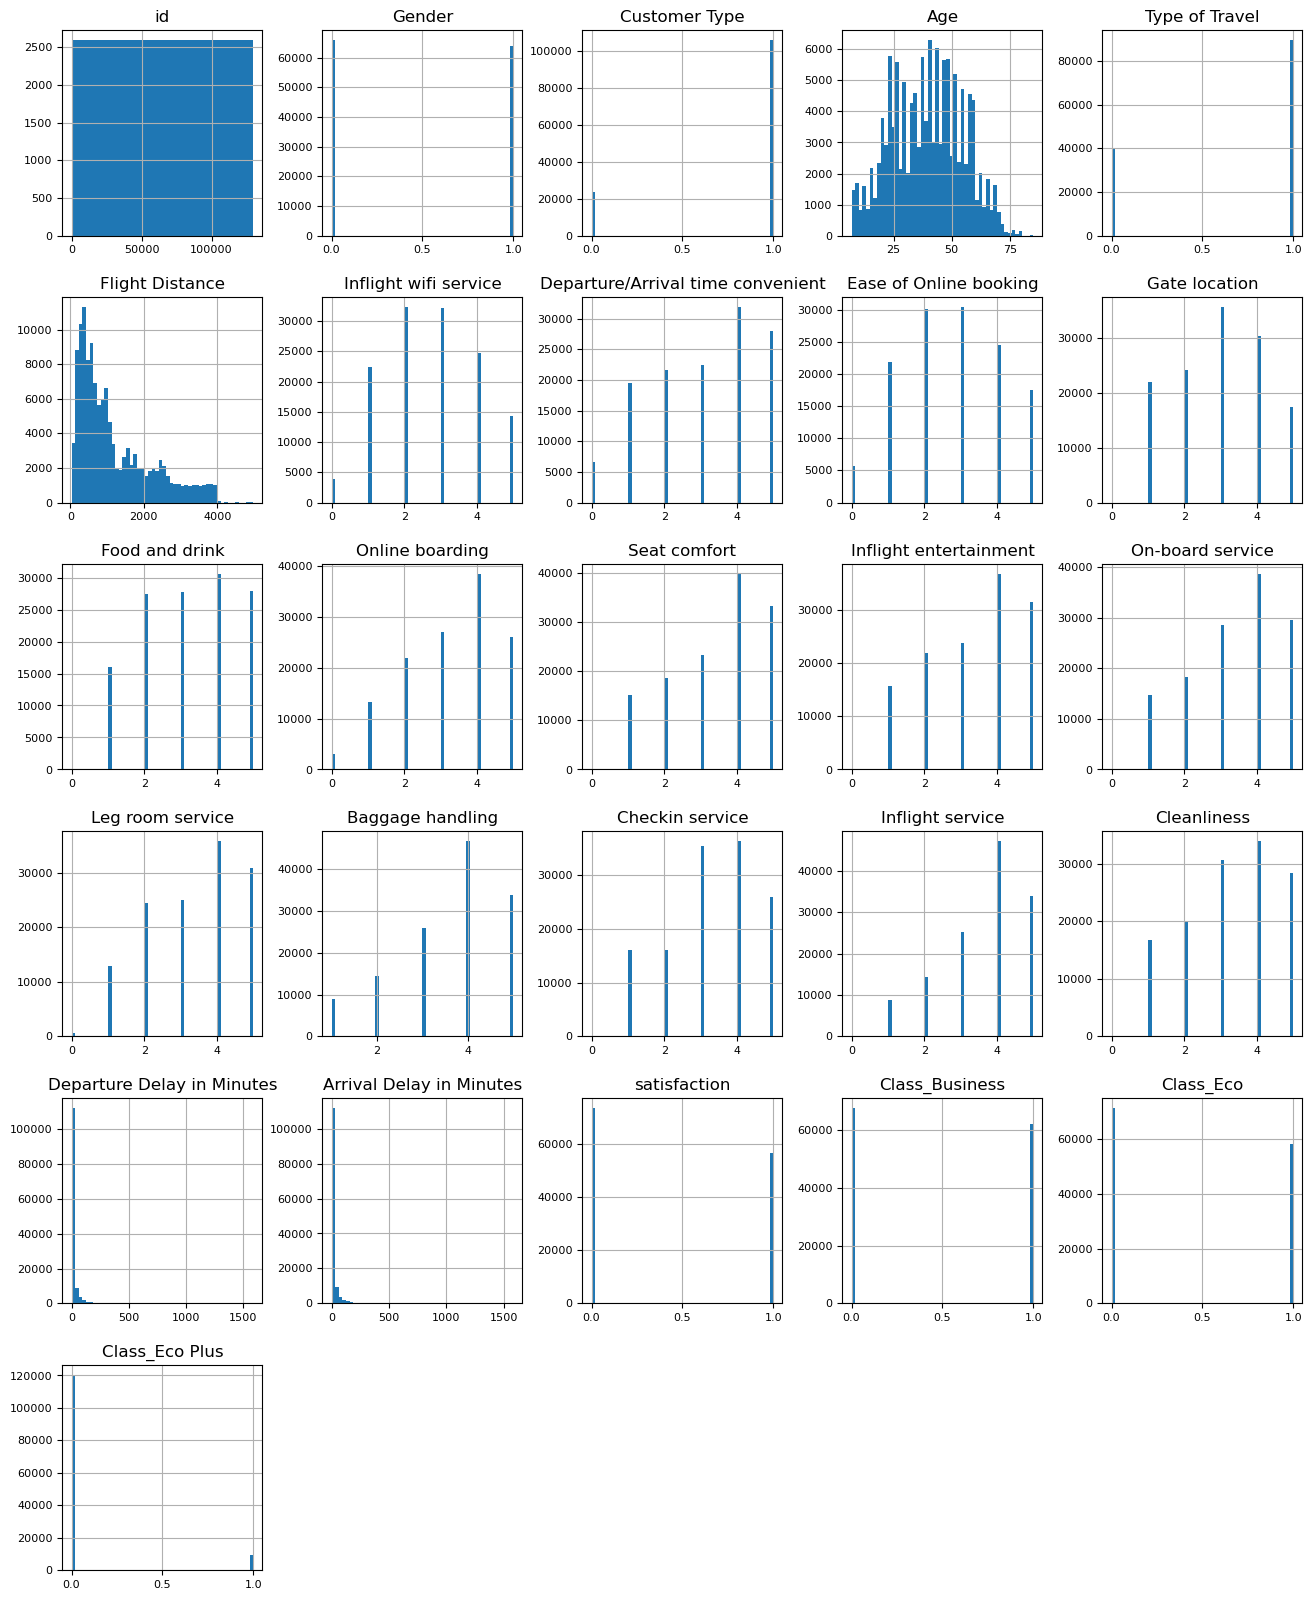

In [48]:
df_without_index.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## 2-7. 이상치 처리

추가로 Departure, Arrival Delay in minutes 에서 시간이 너무 긴 경우가 있다. <br>
이 경우 일반적인 경우가 아니라 특별한 상황이므로 이를 독립변수에 넣기는 일반적인 경우에서의 예측력이 떨어질 수 있다.<br>
이는 우리가 원하는게 아니므로 한번 확인해보겠다.

<Axes: xlabel='Departure Delay in Minutes', ylabel='satisfaction'>

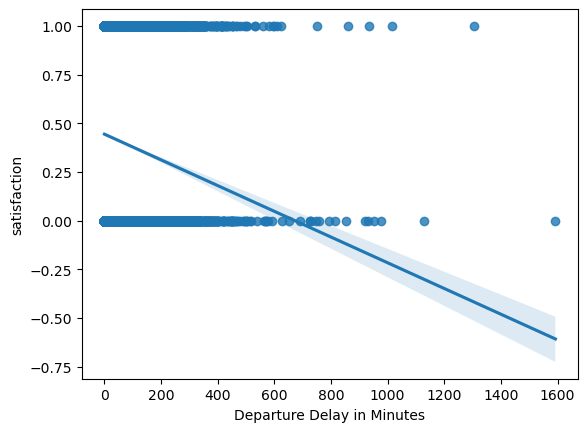

In [51]:
sns.regplot(x="Departure Delay in Minutes", y="satisfaction", data=df)

<Axes: xlabel='Arrival Delay in Minutes', ylabel='satisfaction'>

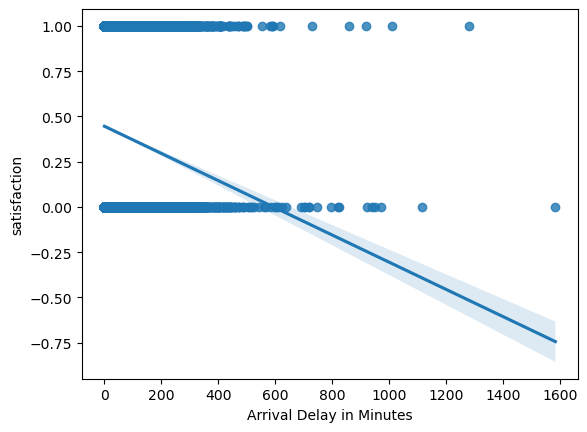

In [52]:
sns.regplot(x="Arrival Delay in Minutes", y="satisfaction", data=df)

<p> 20시간이 넘게 지연되도 만족한 사람, 불만족한 사람이 한명씩 있는것을 확인할 수 있다 (이상치) </p>

In [54]:
delayed_flights = df[(df['Arrival Delay in Minutes'] > 1200) | (df['Departure Delay in Minutes'] > 1200)]
print(delayed_flights) #데이터의 인덱스가 103901 이하이므로 train데이터고, 삭제할 수 있다!

          id  Gender  Customer Type  Age  Type of Travel  Flight Distance  \
6744   69661       1              1   32               1             2916   
83741  73471       0              1   47               0             1120   

       Inflight wifi service  Departure/Arrival time convenient  \
6744                       2                                  2   
83741                      2                                  2   

       Ease of Online booking  Gate location  ...  Checkin service  \
6744                        2              2  ...                5   
83741                       2              3  ...                2   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
6744                  3            5                        1305   
83741                 3            2                        1592   

       Arrival Delay in Minutes  satisfaction  Index  Class_Business  \
6744                     1280.0             1   6744               1   
83741 

In [55]:
df = df.drop(index=[6744, 83741])
df.shape

(129878, 27)

In [56]:
df[103895:103905]

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Index,Class_Business,Class_Eco,Class_Eco Plus
103897,102203,0,1,60,1,1599,5,5,5,5,...,4,4,4,9,7.0,1,103897,1,0,0
103898,60666,1,1,50,0,1620,3,1,3,4,...,2,4,2,0,0.0,0,103898,0,1,0
103899,94171,0,0,23,1,192,2,1,2,3,...,2,3,2,3,0.0,0,103899,0,1,0
103900,73097,1,1,49,1,2347,4,4,4,4,...,5,5,4,0,0.0,1,103900,1,0,0
103901,68825,1,0,30,1,1995,1,1,1,3,...,5,5,4,7,14.0,0,103901,1,0,0
103902,54173,0,0,22,1,1000,1,1,1,5,...,5,4,1,0,0.0,0,103902,0,1,0
103903,62567,1,1,27,1,1723,1,3,3,3,...,4,3,1,0,0.0,0,103903,1,0,0
103904,19556,0,1,52,1,160,5,4,3,4,...,2,5,5,50,44.0,1,103904,0,1,0
103905,90035,0,1,36,1,2863,1,1,3,1,...,3,4,5,0,0.0,1,103905,1,0,0
103906,12360,1,0,20,1,192,2,0,2,4,...,2,2,2,0,0.0,0,103906,0,1,0


In [57]:
df = df.drop(columns=['Index']) #편의상 만들어놓은 Index 컬럼을 다시 제거한다

In [58]:
df = df.reset_index(drop=True) #기존 인덱스를 제거하고 실제 인덱스를 다시 생성

In [59]:
id_list= df['id']

잘 잘린 것을 볼 수 있다 ~

<U>현재 전처리 완료된 데이터:</U><br>
df_train (학습 데이터셋, 타깃 데이터 있음)<br>
df_test (테스트 데이터셋, 타깃 데이터 있음)<br>

<U>인코딩 된 기존 오브젝트형 데이터</U> <br>
'Gender' : {'Female': 0, 'Male': 1}<br>
'Customer Type' : {'Loyal Customer': 1, 'disloyal Customer': 0}<br>
'Type of Travel' : {'Business travel': 1, 'Personal Travel': 0}<br>
'satisfaction' : {'neutral or dissatisfied': 0, 'satisfied': 1} // **타깃 데이터**<br> 
<br>
Class 행은 세 종류의 데이터가 원 핫 인코딩 됨 <br>

# 3. 데이터 분석 

- **순서**
    1. Logistic Regession
    2. Random forest
    3. XGBoost
    4. 모델 평가

## 3.1 데이터 분석 (Logistic Regression)

- **순서**
    1. 데이터 로딩 및 전처리
    2. 독립변수, 종속변수 분리
    3. Train, Test 데이터셋 분리 (0.7: 0.3)
    4. Stepwise 방식 변수 선택
    5. 선택된 최적의 변수로 Logistic 모델 생성
    6. 독립변수 통계적 유의 성 검정 (P-value 검정)

In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

from datetime import datetime
from nltk import ngrams
from collections import Counter
import itertools

import time

### 3.1.1 데이터 로딩
편의상 위에 전처리된 데이터를 ID를 기준으로 다시 불러오는 절차를 거친다.

In [69]:
df1= pd.read_csv('dataset/train.csv', index_col = 0)
df2= pd.read_csv('dataset/test.csv', index_col = 0)
df3= pd.concat([df1,df2], axis=0)

In [70]:
df3= df3[df3['id'].isin(id_list)] 
df= df3
df.drop(['id'], axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129878 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129878 non-null  object 
 1   Customer Type                      129878 non-null  object 
 2   Age                                129878 non-null  int64  
 3   Type of Travel                     129878 non-null  object 
 4   Class                              129878 non-null  object 
 5   Flight Distance                    129878 non-null  int64  
 6   Inflight wifi service              129878 non-null  int64  
 7   Departure/Arrival time convenient  129878 non-null  int64  
 8   Ease of Online booking             129878 non-null  int64  
 9   Gate location                      129878 non-null  int64  
 10  Food and drink                     129878 non-null  int64  
 11  Online boarding                    129878 non

### 3.1.2 X랑 Y에 독립변수(feature), 설명변수(target) 지정

In [73]:
X = df[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
y = df['satisfaction']

#문자형을 범주횽 변수로 변환
X['Gender'] = X['Gender'].astype('category')
X['Customer Type'] = X['Customer Type'].astype('category')
X['Type of Travel'] = X['Type of Travel'].astype('category')
X['Class'] = X['Class'].astype('category')

In [74]:
# 종속변수 더미 변환
y.replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

In [75]:
#결측치 대체 
X['Arrival Delay in Minutes']= X['Arrival Delay in Minutes'].replace(np.nan, X['Arrival Delay in Minutes'].mean())

### 3.1.3 범주형(카테고리) 변수 dummy로 만들기 (+ 정규화)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.3, random_state=2024)

In [78]:
X_train= pd.get_dummies(X_train)
X_train=X_train.astype(float)

X_test= pd.get_dummies(X_test)
X_test=X_test.astype(float)

### 3.1.4 Stepwise 변수선택법

- 정의 : 전진선택법과 후진선택법을 모두 사용해서, 최적의 독립변수를 선택하여 모델을 구성하는 방법론

In [80]:
# 실해하면 너무 오래 결려서 주석처리 합니다.


# import time
# #%%
# # 초기화
# startpoint = time.time()
# selected_features = []
# best_aic = float("inf")  # 초기 AIC를 무한대로 설정
# loopCount = 0

# while True:
#     added = None
#     removed = None
#     # Forward Selection
#     for feature in X_train.columns:
#         if feature not in selected_features:
#             temp_features = selected_features + [feature]
            
#             model = sm.Logit(np.asanyarray(y_train), sm.add_constant(X_train[temp_features])).fit(method = 'bfgs')
#             aic = model.aic
#             if aic < best_aic:
#                 best_aic = aic
#                 added = feature
                
                
#     # Backward Elimination
#     if len(selected_features) > 0:
#         for feature in selected_features:
#             temp_features = [f for f in selected_features if f != feature]
#             model = sm.Logit(np.asanyarray(y_train), sm.add_constant(X_train[temp_features])).fit(method = 'bfgs')
#             aic = model.aic
#             if aic < best_aic:
#                 best_aic = aic
#                 removed = feature
#     if added is not None:
#         selected_features.append(added)
#     elif removed is not None:
#         selected_features.remove(removed)
#     else:
#         break
#     time.sleep(1)
#     loopCount += 1


In [81]:
# finishPoint = time.time()
# print('\n',"변수선택 걸린시간: ",finishPoint - startpoint, "초.")  
# print("Best selected features:", selected_features)
# print("Best AIC:", best_aic)


# 변수선택 걸린시간:  366.8491096496582 초.
# Best selected features: ['Online boarding', 'Type of Travel_Business travel', 'On-board service', 'Customer Type_Loyal Customer', 'Checkin service', 'Inflight entertainment', 'Leg room service', 'Class_Business', 'Inflight wifi service', 'Ease of Online booking', 'Arrival Delay in Minutes', 'Cleanliness', 'Baggage handling', 'Type of Travel_Personal Travel', 'Departure/Arrival time convenient', 'Age', 'Inflight service', 'Customer Type_disloyal Customer', 'Seat comfort', 'Gate location', 'Departure Delay in Minutes', 'Food and drink']
# Best AIC: 48530.772599865784

- 변수선택 걸린시간:  366.8491096496582 초.
- Best selected features: ['Online boarding', 'Type of Travel_Business travel', 'On-board service', 'Customer Type_Loyal Customer', 'Checkin service', 'Inflight entertainment', 'Leg room service', 'Class_Business', 'Inflight wifi service', 'Ease of Online booking', 'Arrival Delay in Minutes', 'Cleanliness', 'Baggage handling', 'Type of Travel_Personal Travel', 'Departure/Arrival time convenient', 'Age', 'Inflight service', 'Customer Type_disloyal Customer', 'Seat comfort', 'Gate location', 'Departure Delay in Minutes', 'Food and drink']
- Best AIC: 48530.772599865784


- **순서**
    1. 데이터 로딩 및 전처리
    2. 독립변수, 종속변수 분리
    3. Train, Test 데이터셋 분리 (0.7: 0.3)
    4. Stepwise 방식 변수 선택
---
- **변수선택법**
  - Stepwise는 Forward, Backward 변수 선택법을 혼합한 방법론이다. Forward 방식은 변수를 하나씩 추가하며 AIC를 가장 많이 증가시키는 변수 조합을 찾는 방법이고, Backward는 변수를 하나씩 빼면서 AIC를 가장 많이 증가시키는 변수 조합을 찾는 방법이다. Stepwise는 이둘을 동시에 진행하여 최적의 변수조합을 찾는다
---          
-  **독립변수 통계적 유의 성 검정 (P-value 검정)**
      -  Type of Travel(여행 목적), Customer type(충성고객 유뮤)를 제외한 모든 변수는 통계적 유의성을 갖춘것으로 보인다.


#### 변수선택

In [85]:
X_train= X_train[['Online boarding', 'Type of Travel_Business travel', 'On-board service', 'Customer Type_Loyal Customer', 'Checkin service', 'Inflight entertainment', 'Leg room service', 'Class_Business', 'Inflight wifi service', 'Ease of Online booking', 'Arrival Delay in Minutes', 'Cleanliness', 'Baggage handling', 'Type of Travel_Personal Travel', 'Departure/Arrival time convenient', 'Age', 'Inflight service', 'Customer Type_disloyal Customer', 'Seat comfort', 'Gate location', 'Departure Delay in Minutes', 'Food and drink']]
y_train= y_train

X_test= X_test[['Online boarding', 'Type of Travel_Business travel', 'On-board service', 'Customer Type_Loyal Customer', 'Checkin service', 'Inflight entertainment', 'Leg room service', 'Class_Business', 'Inflight wifi service', 'Ease of Online booking', 'Arrival Delay in Minutes', 'Cleanliness', 'Baggage handling', 'Type of Travel_Personal Travel', 'Departure/Arrival time convenient', 'Age', 'Inflight service', 'Customer Type_disloyal Customer', 'Seat comfort', 'Gate location', 'Departure Delay in Minutes', 'Food and drink']]
y_test= y_test

### 3.1.5 독립변수 검정

In [87]:
X_train['intercept'] = 1

logit_mod = sm.Logit(y_train, X_train)
results = logit_mod.fit()
print(results.summary())

X_train=X_train.drop('intercept', axis=1)

Optimization terminated successfully.
         Current function value: 0.334259
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                90914
Model:                          Logit   Df Residuals:                    90893
Method:                           MLE   Df Model:                           20
Date:                Fri, 05 Jul 2024   Pseudo R-squ.:                  0.5117
Time:                        13:35:37   Log-Likelihood:                -30389.
converged:                       True   LL-Null:                       -62238.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Online boarding                       0.6070      0.011     55

독립 변수 검정 결과: 고객 유형을 제외하고 모두 통계적으로 유의한 것으로 나타난다.
- 고객 만족도에 긍정적인 영향을 미치는 변수
    - Online boarding, On-board service, Checkin service, Leg room service, Class_Business, Inflight wifi service
      해석: 온라인 예약, 기내 서비스 만족도, 체크인 서비스 만족도, 레그룸 유뮤, 비즈니스 클래스일때, 기내 와이파이 서비스 등이 고객 만족에 긍정적인 영향을 미치는 변수 중, 계수가 높은 편에 속함

- 고객 만족도에 부정적인 영향을 미치는 변수
    - Ease of Online booking
    - 해석: 온라인 예약이 쉬울 때 등이 고객 만족에 부정적인 영향을 미치는 변수 중, 계수가 높은 편에 속함

#### 정규화
정규화를 하지 않게 되면, 단위가 큰 변수가 더 많은 영향을 끼치게 됨

In [90]:
# 정규화
# X 변수 정규화
from sklearn.preprocessing import StandardScaler

X

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

#### 모델 학습

In [92]:
lm= LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression()

#### 예측 

In [94]:
yhat= lm.predict(X_test)

yhat_prob = lm.predict_proba(X_test)

### 3.1.6 모델 성능 평가 

### accruracy_score (정확도 측정)

In [97]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, yhat)

0.872754337337029

### jaccard index (성능평가지표)
- 설명: 자카르트 인덱스는 교집합/합집합이며, 예측값과 실제값이 완전히 일치한다면 1, 반대는 0의 값을 출력한다

In [99]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8004106114890704

### log loss (로그 소실함수)

0.5 이하가 좋음

In [101]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob) #yhat의 확률을 이용할 것

0.33585273186097286

### Confusion Matrix

In [103]:
# Confusion Matrix 그리기 함수정의

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[14123  2789]
 [ 2169 19883]]


Confusion matrix, without normalization
[[14123  2789]
 [ 2169 19883]]


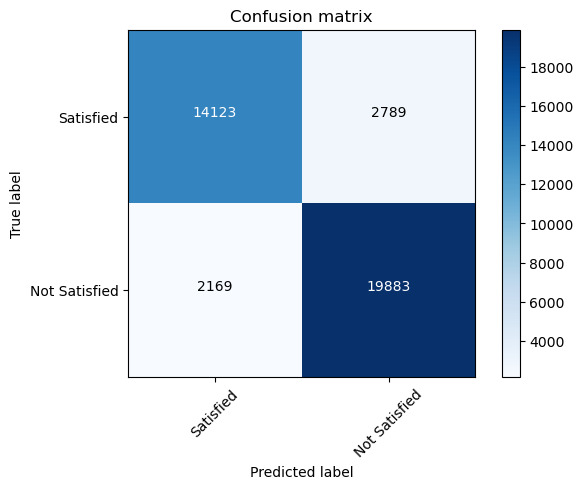

In [104]:
# Confusion Matrix 그리기

# onfusion matrix 계산
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# 시각화
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Satisfied','Not Satisfied'],normalize= False,  title='Confusion matrix')

In [105]:
# 모델 성능 요약
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22052
           1       0.87      0.84      0.85     16912

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964



#### Confusion Matrix 요약
Accuracy= 0.87
- 예측값 중에서 실제 값을 맞춘 비율
- 해석: 좋음


Specificity= 0.90
- 실제 만족하지 못한 승객을 만족하지 못했다고 예측할 비율 (만족하지 못한 고객을 식별하는게 중요하다)
- 해석: 좋음


log loss= 0.33
- 모델 성능 평가 지표
- 해석: 좋음(이유: 0.5 이하)

f1-score= 0.87
- recall과 precision의 조화평균, 높을 수록 좋음 (0~1)
- 해석: 좋음

___

## 3.2 데이터 분석(Random forest)

### 모델링 (하이퍼 파라미터 정의) 

In [109]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

warnings.filterwarnings('ignore')
# n_estimaors는 트리의 갯수로 높을 수록 성능은 좋아지지만 계산이 길어지므로 10으로 조정
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

# Test set에 대한 성능 확인
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  



Test set에 대한 성능
정확도:0.9591


단순 n_estimaors를 10으로 두었을 때, 정확도가 0.9565인것으로 알수있음
충분히 높은 정확도를 가지고 있지만 조금 더 높은 정확도를 위해 더 많은 하이퍼 파라미터 탐색을 통해 파라미터 최적화를 실시하고자 함.

### 3.2.1 트리개수 추정

100%|██████████| 50/50 [03:58<00:00,  4.77s/it]


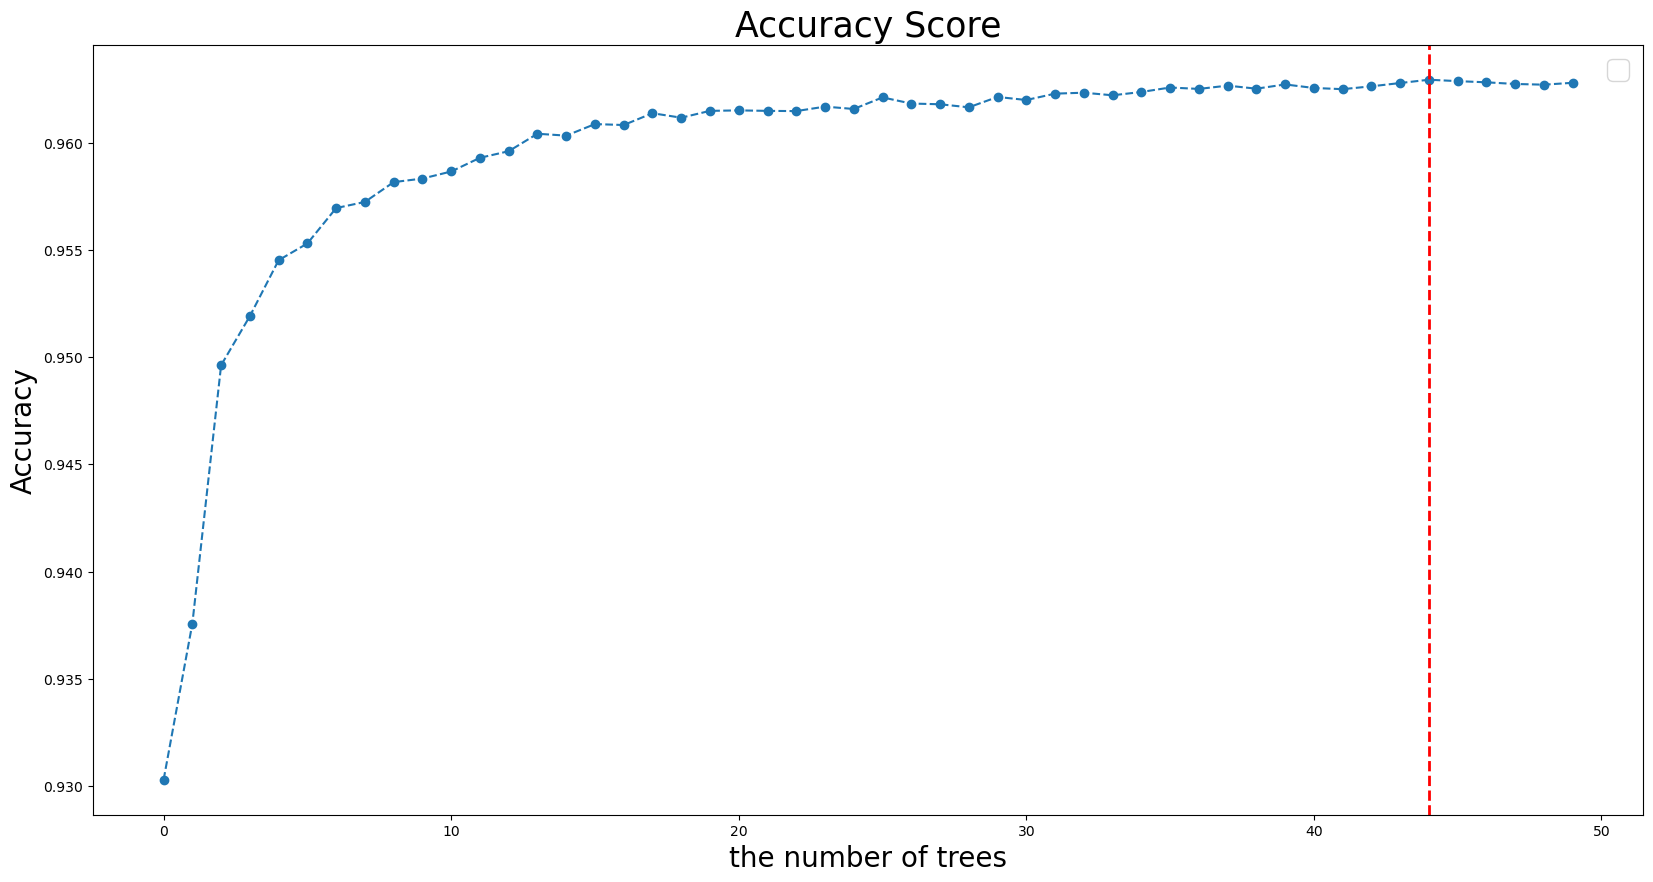

In [112]:
# 탐색할 트리의 갯수를 1~50까지 리스트의 형태로 만들어주고 cv를 통해 최적의 n_estimators값을 추정
# 주의.. 오래걸림
cv_scores = []
estimator_list =[i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
    rfc = RandomForestClassifier(n_estimators=i+1,# 1~50까지 늘려가면 반복문 생성
                                 n_jobs=-1, #사용하는 CPU의 갯수 -1이 최대 활용
                                 random_state=2024) # 시드를 고정할 때 사용 위에도 2024로 고정했기에 비교를 위해서 2024로 고정
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

# 트리의 갯수를 시각화로 나타냄
best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [113]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")

최적의 tree개수:45


최적의 tree개수는 50이 나온것을 알 수 있다. 이에 더 높은 tree갯수가 더 좋은 성능을 낼 경우가 있기 때문에 조금 더 높은 범위를 지정해서 다시 구해보자


100%|██████████| 10/10 [01:42<00:00, 10.21s/it]


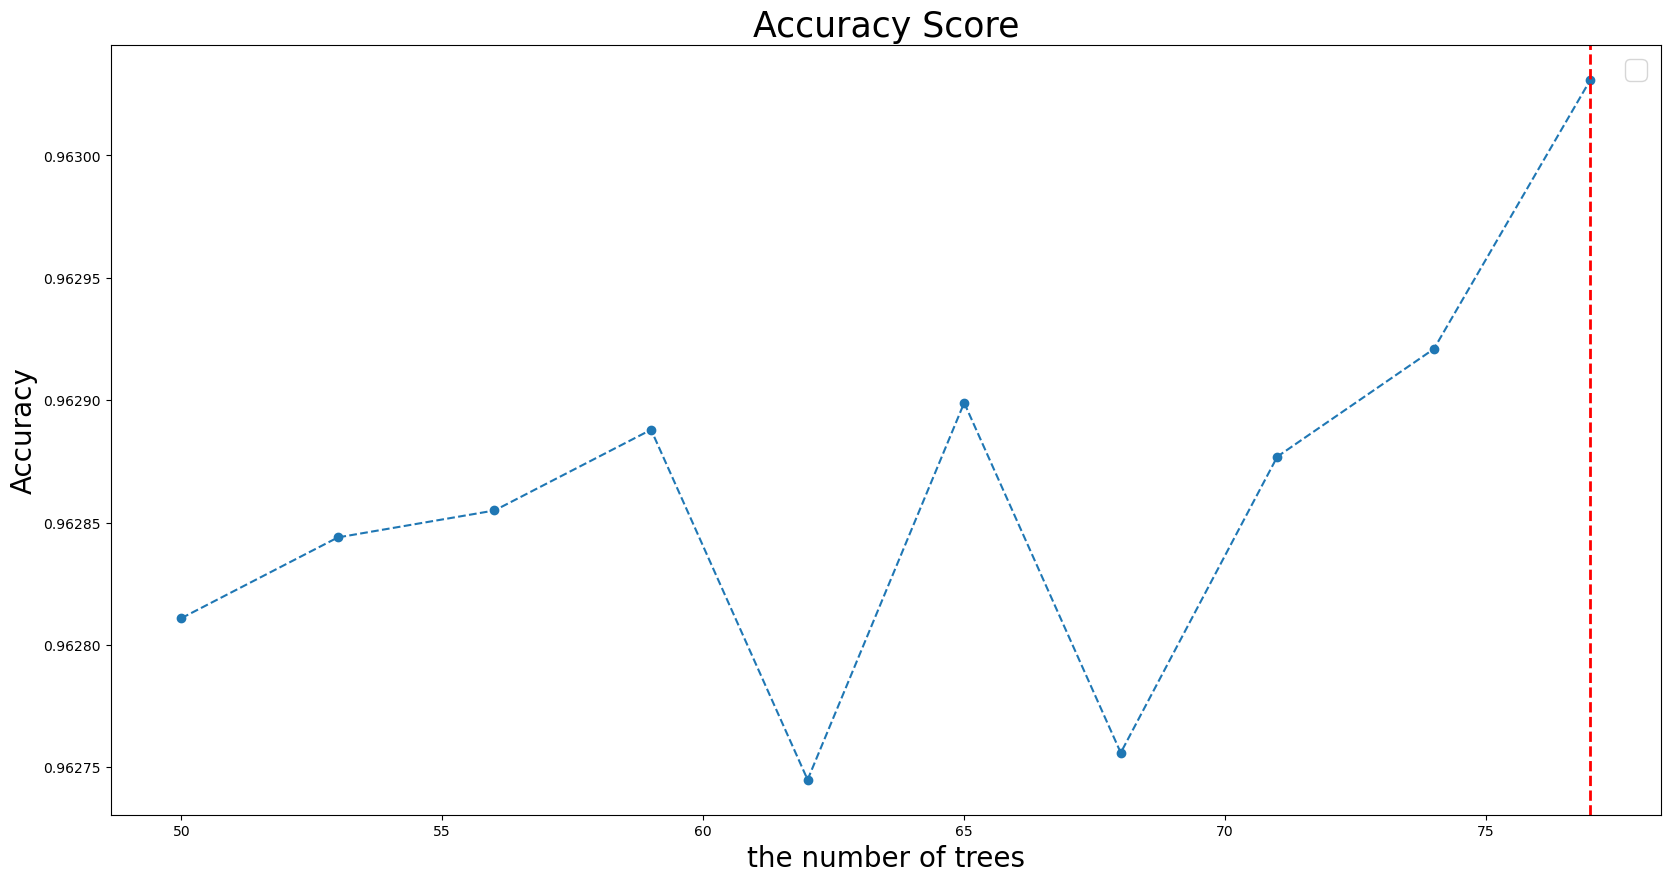

In [115]:
# 탐색할 트리의 갯수를 1~50까지 리스트의 형태로 만들어주고 cv를 통해 최적의 n_estimators값을 추정
# 주의.. 오래걸림
cv_scores = []
estimator_list =[i for i in range(50,80,3)]
for i in tqdm(range(50,80,3)):
    rfc = RandomForestClassifier(n_estimators=i+1,# 1~50까지 늘려가면 반복문 생성
                                 n_jobs=-1, #사용하는 CPU의 갯수 -1이 최대 활용
                                 random_state=2024) # 시드를 고정할 때 사용 위에도 2024로 고정했기에 비교를 위해서 2024로 고정
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

# 트리의 갯수를 시각화로 나타냄
best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [116]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))*3+50}")

최적의 tree개수:77


최적의 tree개수는 77개로 나왔다 그래프가 양의 상관관계를 가지고 있는 것으로 보아 더 높은 tree의 갯수가 더 높은 성능을 나타낼 가능성이 있어보이지만 Accuracy가 0.001만큼으로 사소한 정도인 것으로 보아 더 이상의 높은 tree개수는 오히려 계산만 복잡하게 만들수 있다.

대신 tree개수 외의 하이퍼 파라미터를 지정하여 성능을 높일 수 있다. 'ctriterion', 'max_features'를 추가하여 성능을 높여보자. 다른 목록들도 많지만 오히려 너무 많은 목록을 지정하면 성능이 떨어질 우려가 있어 이 두가지만 지정해 보도록 하자.

In [118]:
rfc = RandomForestClassifier(random_state=2024)
param_grid = {
    'n_estimators': [77],#이전에서 77개가 최적의 트리 갯수였으니 고정
    'criterion':['gini', 'entropy'],#불순도 계산방법
    'max_features':['sqrt', 'log2'] #최대 feature의 갯수
}
# grid를 통해 경우의 수를 모두 고려하여 최적의 경우의 수를 찾아보자

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2024),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [77]},
             verbose=1)

In [119]:
# 최적의 하이퍼 파라미터 셋
CV_rfc.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 77}

최적의 하이퍼 파라미터 셋은 'entropy', 'sqrt'로 나온 것을 알 수 있다. 

In [121]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending=False)
print(result_table[['params', 'mean_test_score']])

                                              params  mean_test_score
2  {'criterion': 'entropy', 'max_features': 'sqrt...         0.963207
3  {'criterion': 'entropy', 'max_features': 'log2...         0.963207
0  {'criterion': 'gini', 'max_features': 'sqrt', ...         0.963031
1  {'criterion': 'gini', 'max_features': 'log2', ...         0.963031


경우의 수가 적으니 모든 경우의 수에 대한 score점수를 보면 'max_features'는 크게 영향을 끼치지 않은 것을 알 수 있고 'gini' 보다 'entropy'가 더 높은 score를 기록한 것을 알수있다.

### 3.2.2 모델 성능 평가

In [124]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

# Test set에 대한 성능
y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  



Test set에 대한 성능
정확도:0.9627


기존 단순 랜덤 포레스트 모델 보다, 하이퍼 파라미터를 조정하여 파라미터 최적화를 시행한 모델이 더 높은 성능을 나타내는 것을 알 수 있다.

#### jaccard index (성능평가지표)

In [127]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred,pos_label=0)

0.9369959240308733

#### Confusion Matrix

In [129]:
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[15902  1010]
 [  443 21609]]


Confusion matrix, without normalization
[[15902  1010]
 [  443 21609]]


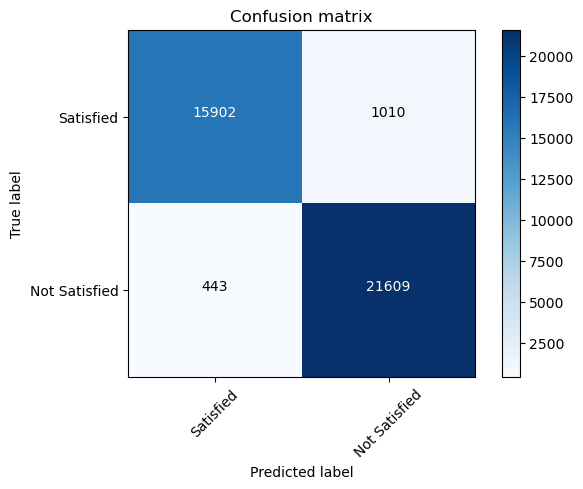

In [130]:
# Confusion Matrix 그리기

# onfusion matrix 계산
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# 시각화
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Satisfied','Not Satisfied'],normalize= False,  title='Confusion matrix')

In [131]:
# 모델 성능 요약
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22052
           1       0.97      0.94      0.96     16912

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



#### Confusion Matrix 요약
Accuracy= 0.96
- 예측값 중에서 실제 값을 맞춘 비율
- 해석: 좋음


Specificity= 0.98
- 실제 만족하지 못한 승객을 만족하지 못했다고 예측할 비율 (만족하지 못한 고객을 식별하는게 중요하다)
- 해석: 좋음


f1-score= 0.96
- recall과 precision의 조화평균, 높을 수록 좋음 (0~1)
- 해석: 좋음

___

## 3.3 데이터 분석(XGBoost)

In [134]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=2024)
xgb.fit(X_train, y_train)

# Test set에 대한 성능 확인
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_true = y_test, y_pred =y_pred_xgb)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc_xgb:0.4f}") 



Test set에 대한 성능
정확도:0.8235


다른 모델들과 다른게 다소 낮은 정확도를 보여주고 있다. XGBosst의 경우 다량의 데이터 셋, 세밀한 파라미터 조정, 데이터의 구조적인 패턴이 있을 때, 높은 성능을 보여준다는 점에서 모델링 중 파라미터를 세밀하게 조정해야 할 필요성이 있다.

### 3.3.1 트리개수 추정

100%|██████████| 50/50 [01:26<00:00,  1.72s/it]


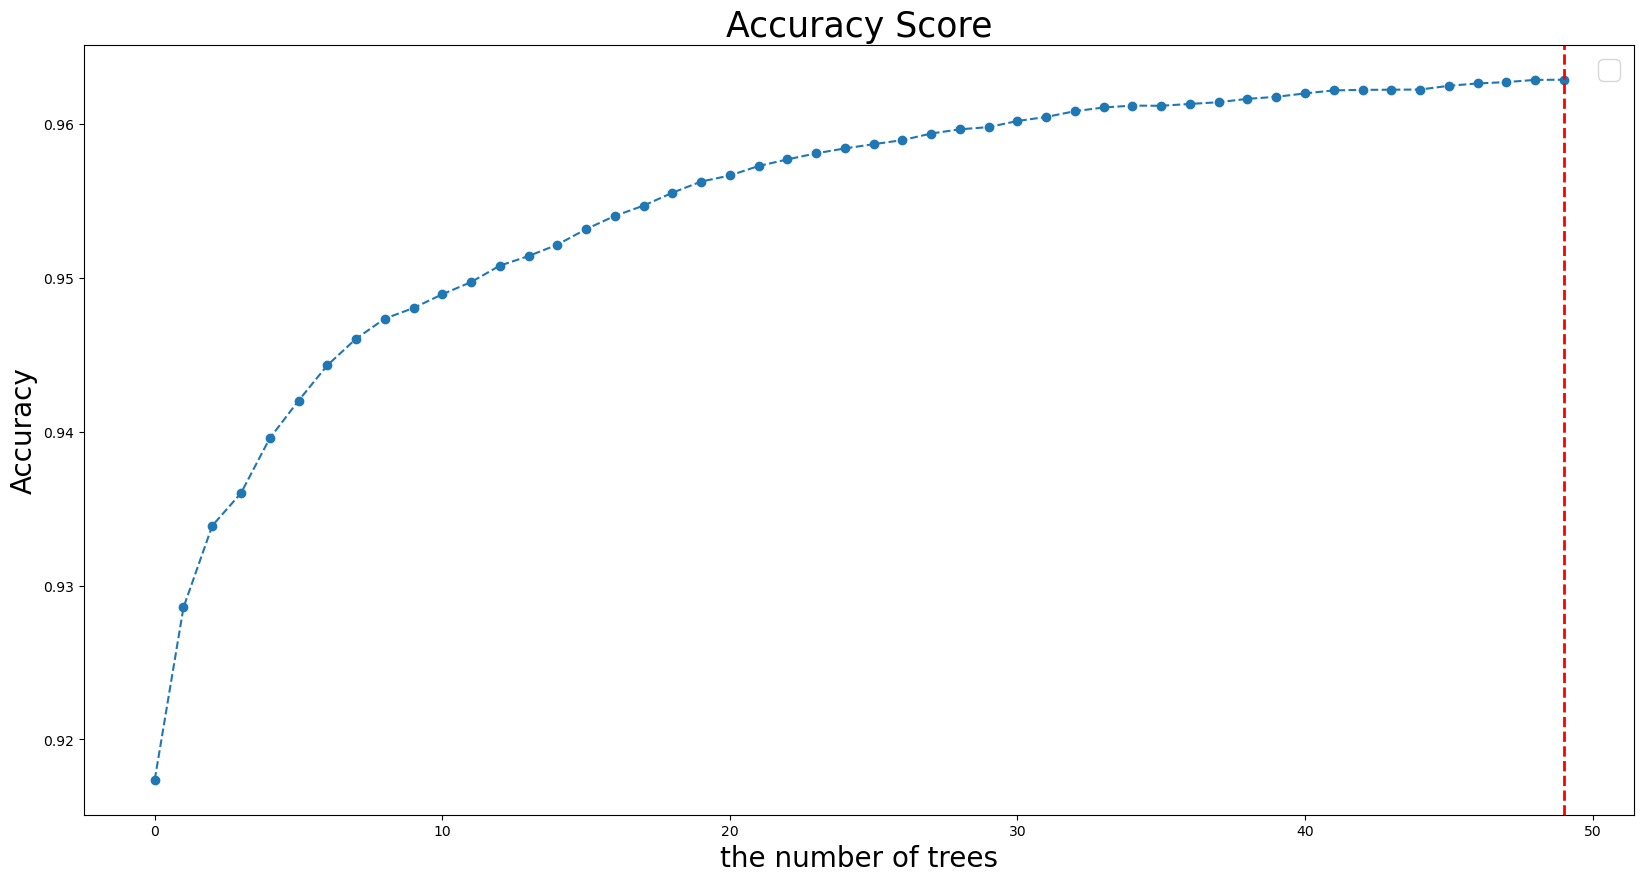

In [137]:
# 탐색할 트리의 갯수를 1~50까지 리스트의 형태로 만들어주고 cv를 통해 최적의 n_estimators값을 추정
# 주의.. 오래걸림
cv_scores = []
estimator_list =[i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
    xgb = XGBClassifier(n_estimators=i+1,# 1~50까지 늘려가면 반복문 생성
                                 n_jobs=-1, #사용하는 CPU의 갯수 -1이 최대 활용
                                 random_state=2024) # 시드를 고정할 때 사용 위에도 2024로 고정했기에 비교를 위해서 2024로 고정
    score = cross_val_score(xgb, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

# 트리의 갯수를 시각화로 나타냄
best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

정확도가 49일때 가장 높게 나왔지만 점차 상승하는 모양을 그리고 있기에 더 높은 숫자로 진행해볼 필요성이 있다

In [139]:
# 탐색할 트리의 갯수를 50~100까지 리스트의 형태로 만들어주고 cv를 통해 최적의 n_estimators값을 추정
# 주의.. 오래걸림
cv_scores = []
estimator_list =[i for i in range(50,100,3)]
for i in tqdm(range(50,100,3)):
    xgb = XGBClassifier(n_estimators=i+1,# 50~100까지 3단위로 늘려가면 반복문 생성
                                 n_jobs=-1, #사용하는 CPU의 갯수 -1이 최대 활용
                                 random_state=2024) # 시드를 고정할 때 사용 위에도 2024로 고정했기에 비교를 위해서 2024로 고정
    score = cross_val_score(xgb, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)



100%|██████████| 17/17 [00:54<00:00,  3.22s/it]


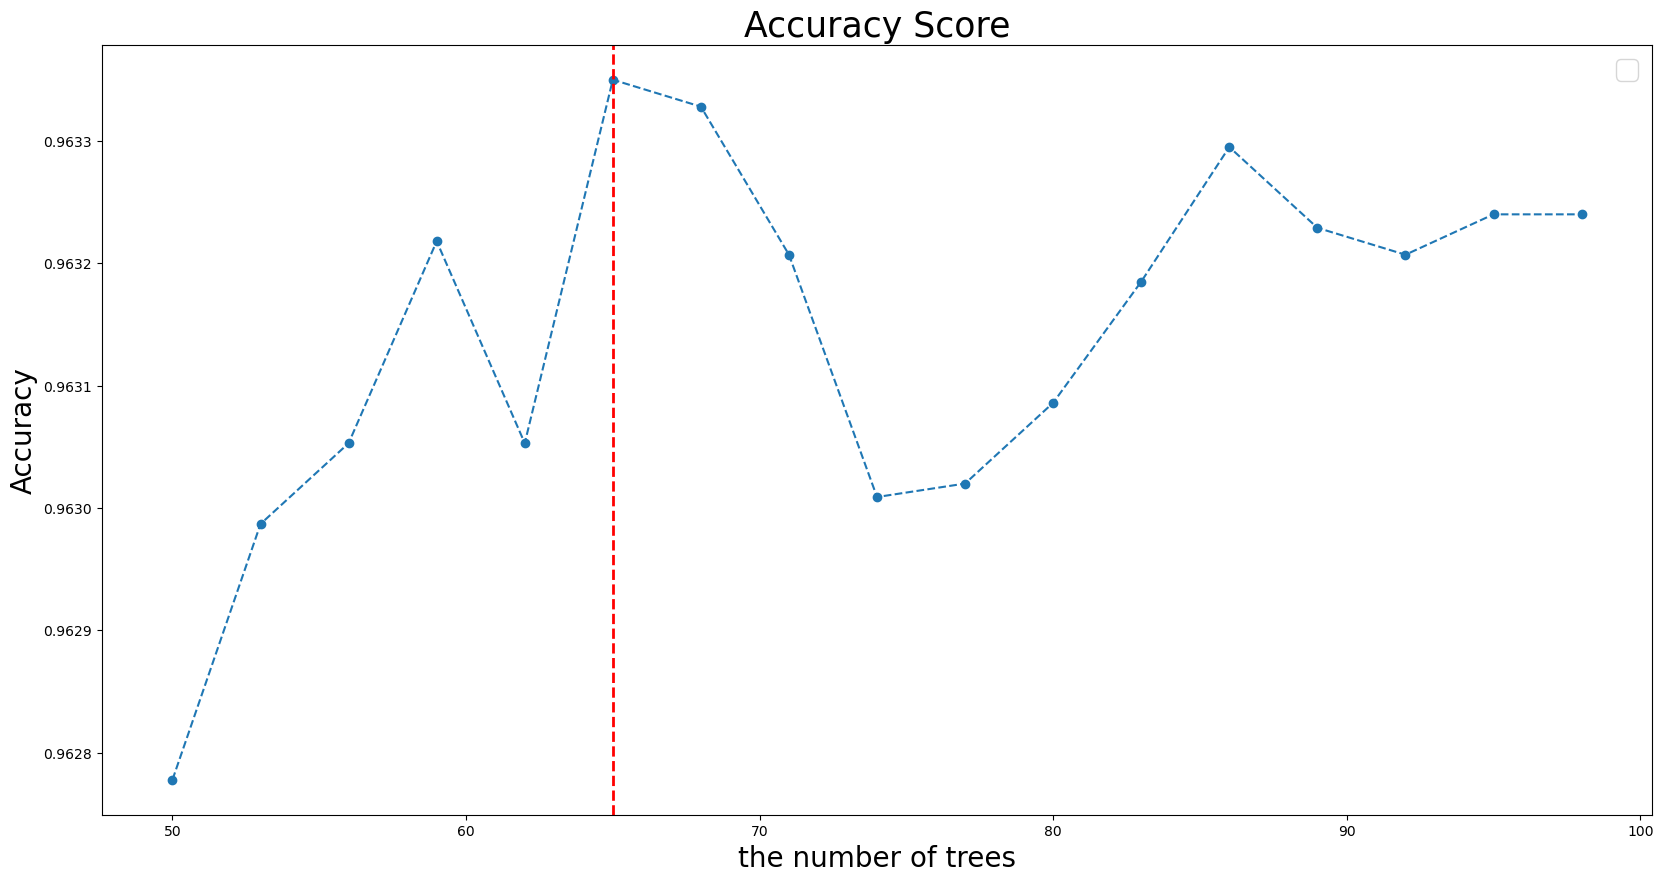

In [140]:
# 트리의 갯수를 시각화로 나타냄
best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [141]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))*3+50}")

최적의 tree개수:65


최적의 tree개수는 77개로 나타났다. 

이제 더 구체적인 하이퍼 파라미터를 조정하여 성능을 높여보자.
XGBoost의 대표적인 파라미터 조정 변수는 'learning_rate'와 'max_depth'이므로 이 두 변수를 조정하여 최적의 하이퍼 파라미터를 추정해 보자

In [144]:
xgb = XGBClassifier(random_state=2024)
param_grid = {
    'n_estimators': [77],#이전에서 77개가 최적의 트리 갯수였으니 고정
    'learning_rate':[0.1, 0.2, 0.3],#학습률, 너무 크면 최저점을 못찾을 수 있고, 너무 작으면 학습이 느림(보통 0.01에서 0.2사이)
    'max_depth':[8, 10, 12] #최대 탐색 깊이(보통 3~10)
    
}
# grid를 통해 경우의 수를 모두 고려하여 최적의 경우의 수를 찾아보자

CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=-1)
CV_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2024, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [8, 10, 12], 'n_estimators': [77]},
             verbose=1)

In [145]:
# 최적의 하이퍼 파라미터 셋
CV_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 77}

최적값을 보아 설정했던 'learning_rate'와 'max_depth'의 범위의 사이값으로 나와 충분히 최적의 값이라고 할 수 있다.

In [147]:
result_table = pd.DataFrame(CV_xgb.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending=False)
print(result_table[['params', 'mean_test_score']])

                                              params  mean_test_score
3  {'learning_rate': 0.2, 'max_depth': 8, 'n_esti...         0.964252
2  {'learning_rate': 0.1, 'max_depth': 12, 'n_est...         0.963900
1  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...         0.963779
4  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...         0.963724
5  {'learning_rate': 0.2, 'max_depth': 12, 'n_est...         0.963482
6  {'learning_rate': 0.3, 'max_depth': 8, 'n_esti...         0.963108
0  {'learning_rate': 0.1, 'max_depth': 8, 'n_esti...         0.963020
7  {'learning_rate': 0.3, 'max_depth': 10, 'n_est...         0.962745
8  {'learning_rate': 0.3, 'max_depth': 12, 'n_est...         0.962481


### 3.3.2 모델 성능 평가

In [149]:
best_xgb = CV_xgb.best_estimator_
best_xgb.fit(X_train, y_train)

# Test set에 대한 성능
y_pred_xgb = best_xgb.predict(X_test)
acc_xgb = accuracy_score(y_true = y_test, y_pred =y_pred_xgb)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc_xgb:0.4f}")  



Test set에 대한 성능
정확도:0.8214


#### jaccard index (성능평가지표)

In [151]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred_xgb,pos_label=0)

0.7222288747854548

In [152]:
print(confusion_matrix(y_test, y_pred_xgb, labels=[1,0]))

[[13911  3001]
 [ 3958 18094]]


Confusion matrix, without normalization
[[13911  3001]
 [ 3958 18094]]


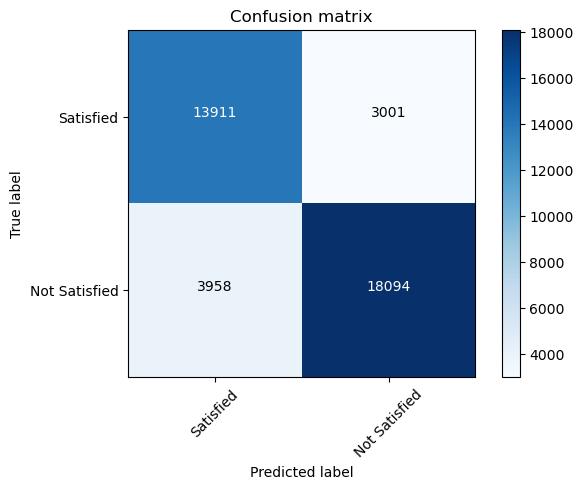

In [153]:
# Confusion Matrix 그리기

# onfusion matrix 계산
cnf_matrix = confusion_matrix(y_test, y_pred_xgb, labels=[1,0])
np.set_printoptions(precision=2)


# 시각화
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Satisfied','Not Satisfied'],normalize= False,  title='Confusion matrix')

In [154]:
# 모델 성능 요약
print (classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     22052
           1       0.78      0.82      0.80     16912

    accuracy                           0.82     38964
   macro avg       0.82      0.82      0.82     38964
weighted avg       0.82      0.82      0.82     38964



#### Confusion Matrix 요약
Accuracy= 0.77
- 예측값 중에서 실제 값을 맞춘 비율
- 해석: 보통


Specificity= 0.79
- 실제 만족하지 못한 승객을 만족하지 못했다고 예측할 비율 (만족하지 못한 고객을 식별하는게 중요하다)
- 해석: 보통


f1-score= 0.77
- recall과 precision의 조화평균, 높을 수록 좋음 (0~1)
- 해석: 보통

___

XGboost의 경우 randomforest, logistic regression보다 낮은 결과가 나온 것을 알 수 있다. 

##  각 모델 평가

-  **Logistic regression**
      -  모델의 전반적인 평가지표(Accuracy, Specificity, lof loss, f1-socre)가 좋다. 특히 우리는 만족하지 못한 승객을 대상으로 마케팅을 하려고 시도하고 있기 때문에 Specificity가 높은 것이 매우 중요하다. 모델의 Specificity는 0.9매우 좋은 성능을 내고 있음을 알 수 있다
      
-  **Random forest**
      - 모델의 전반적인 평가지표(Accuracy, Specificity, lof loss, f1-socre)가 매우 좋다. 위 Logistic regression의 Specificity인 0.9보다 더 높은 0.98을 나타내고 있다.
   
-  **XGBoost**
      - XGBoost - 모델의 전반적인 평가지표(Accuracy, Specificity, lof loss, f1-socre)가 일반적이다 위 두 모델에 비하면 낮은 지표를 나타내고 있다. 조금 더 원인을 찾아야 할 필요성이 있지만 위에 두 모델의 성능이 충분히 좋기 때문에 추가적인 원인을 찾는 것보다 위 두 모델의 성능을 더 높이는 방향으로 가는 것이 적절해 보인다.
      ---              


## 3.4 데이터 분석 (Decision Tree)

- 특징: DecisionTree는 예측과 설명이 모두 가능한 강력한 분석 방법론이다. 그러므로 DecisionTree 분석은 아래 인덱스 1-6번에 걸쳐 예측모델을 만들고, 7-8번에 거쳐 설명모델을 만드는 방식으로 진행한다. 예측모델은 예측성능에 중점을 두어 디자인 할 것이며, 설명모델을 예측결과의 원인인 독립변수를 분석하여, 승객들이 왜 만족하고 불만족하는지에 대해 분석할 것이다.

- **순서**
    1. 데이터 로딩 및 전처리
    2. 독립변수, 종속변수 분리
    3. Train, Test 데이터셋 분리 (0.7: 0.3)
    4. DecisionTree 하이퍼 파라미터 최적화 (GridSearchCV)
    5. 선택된 최적의 하이퍼 파라미터 조합으로 DecisionTree Classifier 모델 생성
    6. 모델 평가
    7. 변수 중요도 시각화
    8. 모델 규칙 시각화

In [161]:
import pandas as pd
import numpy as np
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import pydotplus
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 3.4.1 데이터 로딩

In [163]:
df1= pd.read_csv('dataset/train.csv', index_col = 0)
df2= pd.read_csv('dataset/test.csv', index_col = 0)
df3= pd.concat([df1,df2], axis=0)


In [164]:
df3= df3[df3['id'].isin(id_list)] 
df= df3
df.drop(['id'], axis=1, inplace=True)

### 3.4.2 X랑 Y에 독립변수(feature), 설명변수(target)을 지정한다.

In [166]:
X = df[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
y = df['satisfaction']

#문자형을 범주횽 변수로 변환
X['Gender'] = X['Gender'].astype('category')
X['Customer Type'] = X['Customer Type'].astype('category')
X['Type of Travel'] = X['Type of Travel'].astype('category')
X['Class'] = X['Class'].astype('category')

In [167]:
#결측치 대체 
X['Arrival Delay in Minutes']= X['Arrival Delay in Minutes'].replace(np.nan, X['Arrival Delay in Minutes'].mean())

### 3.4.3 train, test 데이터 분리

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.3, random_state=2024)

### 3.4.4 더미변수화

In [171]:
X_train= pd.get_dummies(X_train)
X_train=X_train.astype(float)

X_test= pd.get_dummies(X_test)
X_test=X_test.astype(float)

### 3.4.5 하이퍼 파라미터 최적화
max_depth(나무의 깊이),  min_samples_leaf(리프노드에 필요한 최소 샘플 수), criterion(분리기준) 세 가지 파라미터를 GridSearchCV를 통해 최적화
모든 조합을 고려하여 가장 높은 성능을 내는 하이퍼파라미터 선택

In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2021))

In [174]:

# 하이퍼 파라미터 푀적화
param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['gini', 'entropy']
 
param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]
 
gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미
 
gs = gs.fit(X_train, y_train)
 
print(gs.best_score_)
print(gs.best_params_)


0.9452118671730133
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 10}


### 3.4.6 모델 평가

In [176]:
# 최적의 모델 선택
 
best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(X_train, y_train)
 
yhat = best_tree.predict(X_test)
yhat_prob= best_tree.predict_proba(X_test)

#### accruracy_score (정확도 측정)

In [178]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, yhat)

0.9461297608048455

#### jaccard index (성능평가지표)

자카르트 인덱스는 교집합/합집합이며, 예측값과 실제값이 완전히 일치한다면 1, 반대는 0의 값을 출력한다

In [180]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label='neutral or dissatisfied')

0.9100724047812861

#### log loss (로그 소실함수)

0.5 이하가 좋음

In [182]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob) #yhat의 확률을 이용할 것

0.1749138021901255

#### Confusion Matrix

Confusion matrix, without normalization
[[15623  1289]
 [  810 21242]]


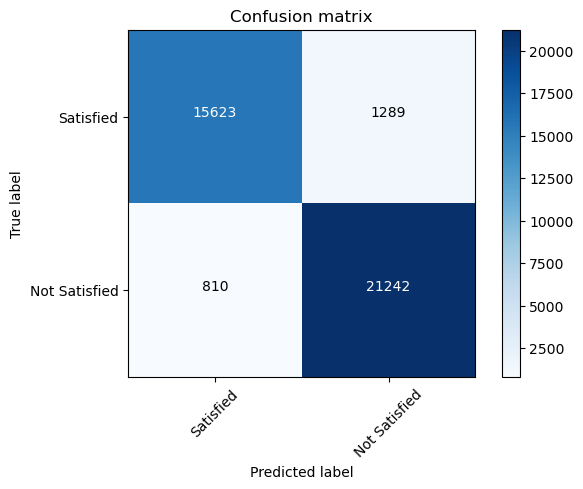

In [184]:
# Confusion Matrix 그리기

# onfusion matrix 계산
cnf_matrix = confusion_matrix(y_test, yhat, labels=['satisfied','neutral or dissatisfied'])
np.set_printoptions(precision=2)


# 시각화
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Satisfied','Not Satisfied'],normalize= False,  title='Confusion matrix')

In [185]:
print (classification_report(y_test, yhat))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     22052
              satisfied       0.95      0.92      0.94     16912

               accuracy                           0.95     38964
              macro avg       0.95      0.94      0.94     38964
           weighted avg       0.95      0.95      0.95     38964



#### Confusion Matrix 요약
Accuracy= 0.94
- 예측값 중에서 실제 값을 맞춘 비율
- 해석: 좋음


Specificity= 0.97
- 실제 만족하지 못한 승객을 만족하지 못했다고 예측할 비율 (만족하지 못한 고객을 식별하는게 중요하다)
- 해석: 좋음


log loss= 0.17
- 모델 성능 평가 지표
- 해석: 좋음(이유: 0.5 이하)

f1-score= 0.94
- recall과 precision의 조화평균, 높을 수록 좋음 (0~1)
- 해석: 좋음

___

### 3.4.7 변수중요도 및 모델 규칙 시각화

### 변수 중요도 시각화

시각화 결과: 온라인 체크인, 기내 와이파이 서비스 만족도, 여행 목적 (출장/ 개인여행) 3가지 변수가 고객의 전반적인 만족도에 중요한 영향을 끼치는 것으로 나타난다.

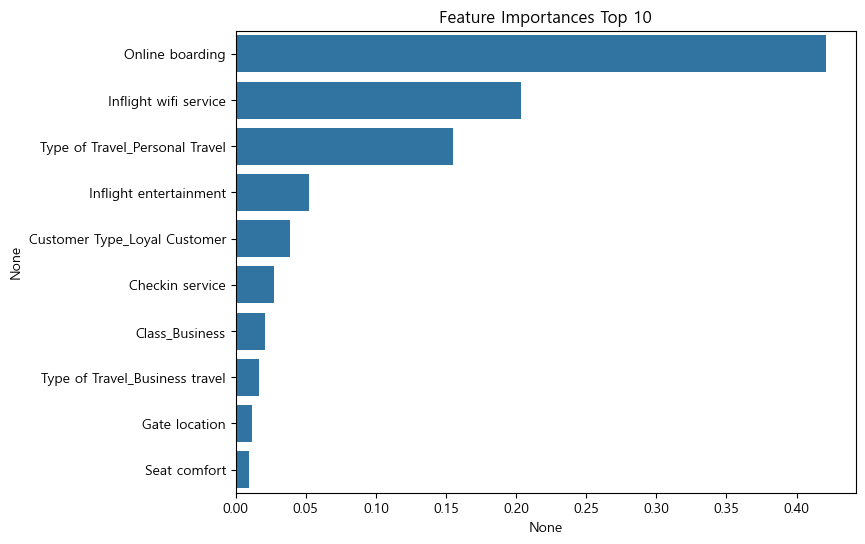

In [189]:
best_tree_for_graph = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, random_state = 2021)
 
best_tree=best_tree_for_graph.fit(X_train, y_train)
 
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
 
import matplotlib as mpl
import matplotlib.font_manager as fm
import os
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
 
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
 
 
feature_importance_values = best_tree.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top10 = feature_importances.sort_values(ascending=False)[:10]
 
plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 10')
sns.barplot(x=feature_top10, y=feature_top10.index)
plt.show()


### 3.4.8 설명 목적의 트리 모델 생성
PrePruning 기법: 트리가 너무 크면 설명이 매우 힘들기 때문에 설명을 위해 의사결정나무의 깊이를 최대 3으로 제한하여 최적의 Hyper parameter를 찾는 방법을 선택한다.

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2021))

In [192]:
# 하이퍼 파라미터 최적화
param_range1 = [1,2,3]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['gini', 'entropy']
 
param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]
 
gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미
 
gs = gs.fit(X_train, y_train)
 
print(gs.best_score_)
print(gs.best_params_)


0.884572155818257
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 10}


In [193]:
# 최적의 모델 선택
best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(X_train, y_train)
 
yhat = best_tree.predict(X_test)
yhat_prob= best_tree.predict_proba(X_test)

### 3.4.9 트리 규칙 시각화

- 하는 이유: 트리의 분류 기준을 통해서 고객이 불만족 하게되는 과정을 알고자 한다. 이를 통해 적절한맞춤 맞케팅 전력을 수립하고자 한다.

- 결과해석: 고객이 불만족에 이르는 상황을 정리하면 다음과 같다

- 불만족에 이르는 과정

    - 불만족 시나리오1: 온라인 체크인 만족도가 낮고, 기내 와이파이 서비스 만족도가 0.5에서 3.5 사이일 때
    - 불만족 시나리오2: 온라인 체크인 만족도가 높고, 여행 목적이며, 기내 와이파이 서비스 만족도가 4.5 이하일 때

- 불만족 시나리오 해석

1. 온라인 체크인 만족도가 낮으면 특별한 경우가 아니고서야, 대부분 불만족하는 것을 알 수 있다. 즉 온라인 체크인에 각별히 신경써야 함을 시사한다. 또한 만약 온라인 체크인에 불만족하는 고객이 있다면 기내식 및 음료 서비스에 관련된 마케팅으로 소비자를 만족상태로 변화시켜야한다.
2. 온라인 체크인 만족도가 높다면 소비자가 만족할 확률이 대폭 상승한다. 이때 소비자를 불만족하게 만드는 가장 큰 요인은 소비자가 개인여행 목적인 경우이다. 결과 그림을 보면 소비자가 개인여행 목적일 때 기내 와이파이 서비스 만족도가 4.5 이상으로 아주 높아지는 경우에만 만족한다. 그러므로 만약 개인 여행 소비자가 기내에 탑승했다면, 그들을 대상으로하는 기내 와이파이 할인 쿠폰과 같이 기내 와이파이 서비스 만족도를 개선시키기 위한 마케팅전략이 필요하다.



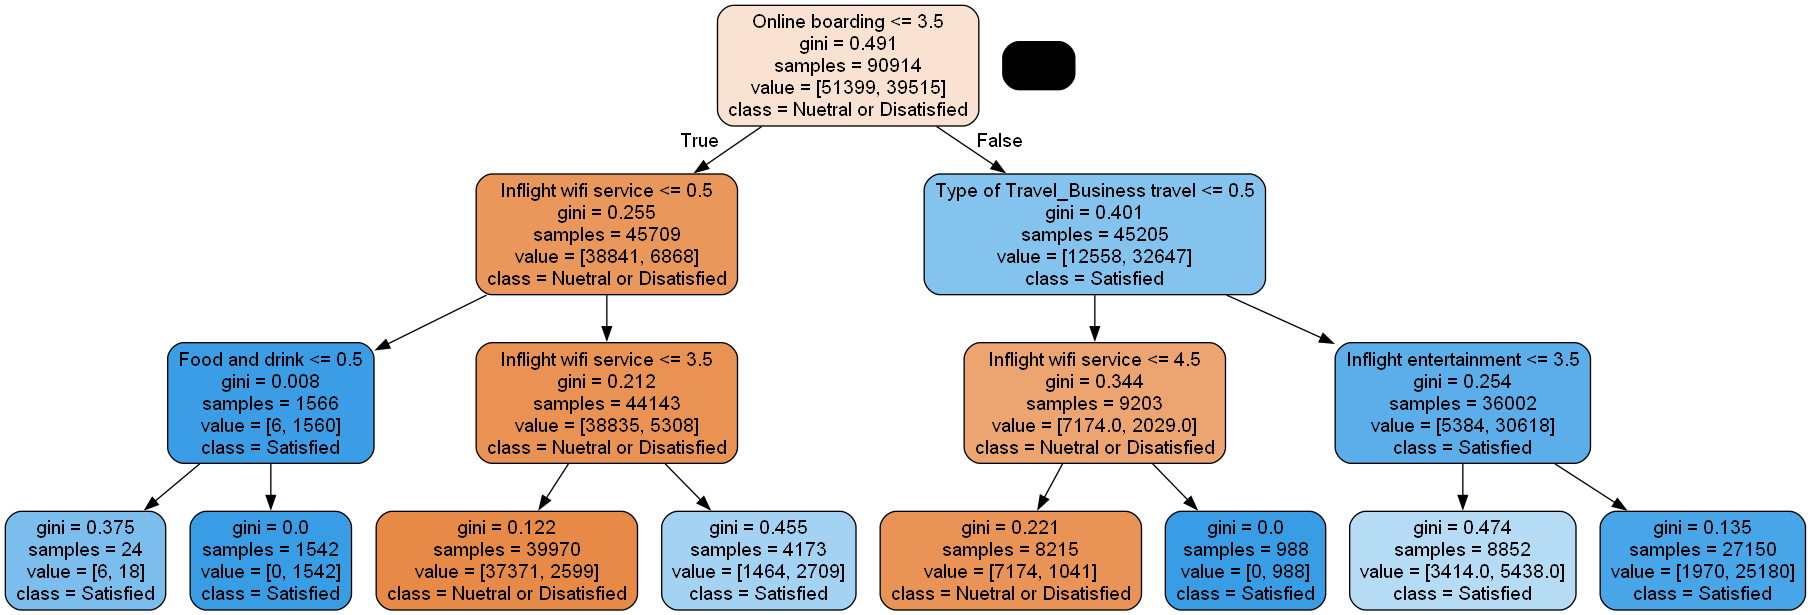

In [195]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import pydotplus
import os
 
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin/' # 경로지정
 
import numpy as np
feature_names = X_train.columns.tolist()
target_name = np.array(['Nuetral or Disatisfied', 'Satisfied'])
 
dot_data = export_graphviz(best_tree.steps[-1][1],
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)
 
graph = graph_from_dot_data(dot_data)
graph.write_png('img/tree2.png') #Tree 이미지를 저장
 
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())


https://ibb.co/cxWzpSD #결과 이미지

# 4. Association Rule Analysis (Questionnaire)

데이터 크기에 따라 적절한 지지도와 신뢰도에 대한 연구에 따르면, 10,000개 이상의 행을 가진 균일 분포 데이터에 대해 0.01 - 0.05 (1% - 5%) 지지도와 0.3 - 0.5 (30% - 50%) 신뢰도를 사용하는 것이 제안된다. 본 분석에서는 결과를 간소화하기 위해 지지도=1% 및 신뢰도=98%를 사용할 것이니다. 분석의 목표는 결과로서 'neutral or dissatisfied'를 가진 연관 규칙을 발견하는 것이므로 'neutral or dissatisfied'인 연관 규칙만 해석할 것이다.

Reference: <Mouakher, A., Hajjej, F., & Ayouni, S. (2022). Efficient Mining Support-Confidence Based Framework Generalized Association Rules. Mathematics>, 10(7), 1163. https://doi.org/10.3390/math10071163

### 4.2 설문데이터 추출

In [199]:
X_train.drop(['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis= 1, inplace=True)

In [200]:
train= pd.concat([X_train, y_train], axis=1)

### 4.3 더미변수화

In [202]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset (list of transactions)

list_of_lists_with_underscores = train.apply(lambda row: [f"{col}_{row[col]}" for col in train.columns], axis=1).tolist()

dataset = list_of_lists_with_underscores
# Convert the dataset into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)


       Baggage handling_1.0  Baggage handling_2.0  Baggage handling_3.0  \
0                     False                 False                 False   
1                     False                  True                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                  True                 False   
...                     ...                   ...                   ...   
90909                 False                 False                 False   
90910                  True                 False                 False   
90911                 False                 False                 False   
90912                 False                  True                 False   
90913                 False                 False                 False   

       Baggage handling_4.0  Baggage handling_5.0  Checkin service_0.0  \
0                     Fal

In [203]:
from mlxtend.frequent_patterns import apriori, association_rules

min_support = 0.1

frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
        support                                           itemsets
0      0.110192                             (Baggage handling_2.0)
1      0.198737                             (Baggage handling_3.0)
2      0.360418                             (Baggage handling_4.0)
3      0.260543                             (Baggage handling_5.0)
4      0.123897                              (Checkin service_1.0)
...         ...                                                ...
18324  0.100271  (Type of Travel_Personal Travel_0.0, On-board ...
18325  0.100271  (Type of Travel_Personal Travel_0.0, On-board ...
18326  0.103218  (Type of Travel_Personal Travel_0.0, On-board ...
18327  0.108520  (Type of Travel_Personal Travel_0.0, On-board ...
18328  0.100271  (Type of Travel_Personal Travel_0.0, On-board ...

[18329 rows x 2 columns]


### 4.4 Association Rules Table 생성

분석의 목표는 고객 불만족을 결과로 하는 연관 규칙을 발견하는 것이다.

In [228]:
pd.set_option('display.max_colwidth', None)
min_confidence = .98 #최소 Confidence 선택
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

desired_consequent = frozenset(['satisfaction_neutral or dissatisfied']) # Select only the rules where the consequent is 'satisfaction_neutral or dissatisfied'.
filtered_rules = rules[rules['consequents'] == desired_consequent]

print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                                                      antecedents  \
1561  (Class_Business_0.0, Ease of Online booking_2.0, Inflight wifi service_2.0)   
1562  (Ease of Online booking_3.0, Inflight wifi service_3.0, Class_Business_0.0)   

                                 consequents   support  confidence      lift  
1561  (satisfaction_neutral or dissatisfied)  0.104956    0.993234  1.756822  
1562  (satisfaction_neutral or dissatisfied)  0.104571    0.990209  1.751472  


# 5. 정리


- **순서**
    1. 데이터 로딩 및 전처리
    2. 독립변수, 종속변수 분리
    3. Train, Test 데이터셋 분리 (0.7: 0.3)
    4. DecisionTree 하이퍼 파라미터 최적화 (GridSearchCV)
    5. 선택된 최적의 하이퍼 파라미터 조합으로 DecisionTree Classifier 모델 생성
    6. 모델 평가
    7. 변수 중요도 시각화
    8. 모델 규칙 시각화
---
- **DecisionTree 하이퍼 파라미터 최적화 (GridSearchCV)**
    - DesisionTree 에는 max_depth(나무의 깊이, 1-10), min_samples_leaf(리프노드에 필요한 최소 샘플 수, 10~50) , criterion(분리기준{gini/entropy}) 세 가지 파라미터가 존재한다. 이를 GridSearchCV를 통해 모든 경우의 수를 고려하여 가장 Accuracy가 높은 하이퍼파라미터의 조합을 선정한다. 오버피팅을 방지하기 위해 교차검증(Crosscalidation) 방식으로 Accuracy를 측정하였다.
  - 결과: max_depth=10, min_samples_leaf=10, criterion= gini의 조합이 가장 Accuracy가 높다는 결과가 도출되었다.
  

---              
-  **모델 평가**
      -  모델의 전반적인 평가지표(Accuracy, Specificity, lof loss, f1-socre)가 과하게 좋다. 점수가 너무 높아 오버피팅이 우려되는 정도이다. 특히 우리는 만족하지 못한 승객을 대상으로 마케팅을 하려고 시도하고 있기 때문에 Specificity가 높은 것이 매우 중요하다. 모델의 Specificity는 0.97로 굉장히 좋은 모델이라고 할 수 있다.
 
---
- **변수 중요도 시각화**
    - DecisionTree가 분류를 수행하는데 영향을 가장 많이 미친 10개의 변수를 시각화했다. 그 결과 온라인 체크인, 기내 와이파이 서비스 만족도, 여행 목적 (출장/ 개인여행) 3가지 변수가 고객의 전반적인 만족도에 지대한 영향을 끼치는 것으로 나타난다.
---
- **모델 규칙 시각화**
  
- 목적: DecisionTree의 강점은 예측결과의 원인을 정확하게 해석할 수 있다는 것이다. 그러므로 위에서 만든 예측모델보다 훨씬 간단한 모델을 제작하여, 고객이 만족 또는 불만족에 이르는 과정을 추적하고자 한다. 이러한 방식은 설명적 데이터 분석이라고 불리며, 우리는 모델 규칙 중불만족으로 분류되는 2가지 시나리오를 도출하였다. 그중 우리 기업은 불만족 고객에 맞춰 마케팅을 진행하고자 하므로, 불만족 시나리오를 끊을 수 있는 마케팅 전략이 필요하다. (예: 기내와이파이 서비스 보강, 온라인 체크인 서비스 보강, 개인 여행 목적 승객에게는 기내 와이파이 및 오락서비스 할인 제공 등)


- 불만족 시나리오 해석

1. 온라인 체크인 만족도가 낮으면 특별한 경우가 아니고서야, 대부분 불만족하는 것을 알 수 있다. 즉 온라인 체크인에 각별히 신경써야 함을 시사한다. 또한 만약 온라인 체크인에 불만족하는 고객이 있다면 기내식 및 음료 서비스에 관련된 마케팅으로 소비자를 만족상태로 변화시켜야한다.
2. 온라인 체크인 만족도가 높다면 소비자가 만족할 확률이 대폭 상승한다. 이때 소비자를 불만족하게 만드는 가장 큰 요인은 소비자가 개인여행 목적인 경우이다. 결과 그림을 보면 소비자가 개인여행 목적일 때 기내 와이파이 서비스 만족도가 4.5 이상으로 아주 높아지는 경우에만 만족한다. 그러므로 만약 개인 여행 소비자가 기내에 탑승했다면, 그들을 대상으로하는 기내 와이파이 할인 쿠폰과 같이 기내 와이파이 서비스 만족도를 개선시키기 위한 마케팅전략이 필요하다.


## DeepLearning (추가_연구)

In [233]:
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [234]:
df1= pd.read_csv('dataset/train.csv', index_col = 0)
df2= pd.read_csv('dataset/test.csv', index_col = 0)
df3= pd.concat([df1,df2], axis=0)

In [235]:
df3= df3[df3['id'].isin(id_list)] 
df= df3
df.drop(['id'], axis=1, inplace=True)

In [236]:
X = df[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
y = df['satisfaction']

# Convert categorical variables to category type
X['Gender'] = X['Gender'].astype('category')
X['Customer Type'] = X['Customer Type'].astype('category')
X['Type of Travel'] = X['Type of Travel'].astype('category')
X['Class'] = X['Class'].astype('category')

In [238]:
# Replace missing values
X['Arrival Delay in Minutes']= X['Arrival Delay in Minutes'].replace(np.nan, X['Arrival Delay in Minutes'].mean())

In [241]:
category_feature= ['Gender', 'Customer Type', 'Type of Travel', 'Class']

X_scaled= X.drop(columns=category_feature, inplace=False)
X_cate= X[category_feature]

In [242]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_scaled= ss.fit_transform(X_scaled)

In [247]:
X_cate= pd.get_dummies(X_cate)
X_cate=X_cate.astype(float).to_numpy()

In [248]:
X_array= np.concatenate([X_scaled, X_cate], axis= 1).astype(np.float32)
y[y=='neutral or dissatisfied']= 0; y[y=='satisfied']= 1
y= y.astype(np.float32)

In [249]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_array, y, test_size=.3, random_state=2024)

In [250]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=.2, random_state=2024)

In [251]:
X_train.shape

(72731, 27)

### 모델 구축

In [258]:
from tensorflow import keras

In [259]:
model= keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(27,)))
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Dense(80, activation='relu'))
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Dense(60, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [260]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,801 (61.72 KB)

 Trainable params: 15,801 (61.72 KB)

 Non-trainable params: 0 (0.00 B)

In [261]:
rmsprop= keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb= keras.callbacks.ModelCheckpoint('best-dnn-model.keras', save_best_only=True)
earlry_stopping_cb= keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history= model.fit(X_train ,y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint_cb, earlry_stopping_cb])

Epoch 1/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6991 - loss: 0.5695 - val_accuracy: 0.8681 - val_loss: 0.3334
Epoch 2/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8437 - loss: 0.3847 - val_accuracy: 0.8849 - val_loss: 0.2981
Epoch 3/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8705 - loss: 0.3373 - val_accuracy: 0.8944 - val_loss: 0.2751
Epoch 4/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8827 - loss: 0.3080 - val_accuracy: 0.9019 - val_loss: 0.2567
Epoch 5/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8920 - loss: 0.2872 - val_accuracy: 0.9094 - val_loss: 0.2382
Epoch 6/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8941 - loss: 0.2753 - val_accuracy: 0.9115 - val_loss: 0.2261
Epoch 7/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9008 - loss: 0.2580 - val_accuracy: 0.9160 - val_loss: 0.2150
Epoch 8/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9034 - loss: 0

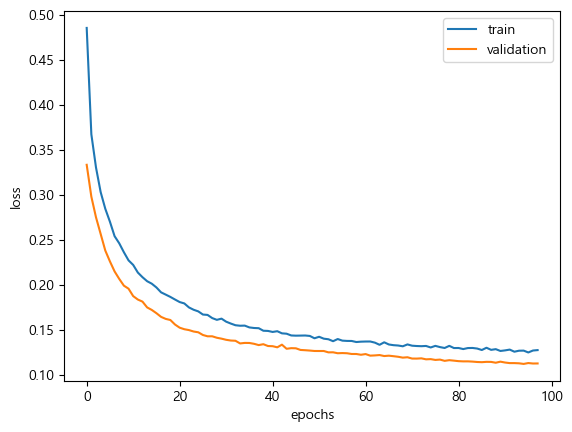

In [262]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

In [263]:
model.evaluate(X_test, y_test)

1218/1218 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.9529 - loss: 0.1154


[0.11290180683135986, 0.9545477628707886]